In [1]:
pip install imbalanced_learn

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install -U imbalanced-learn

Requirement already up-to-date: imbalanced-learn in /opt/conda/lib/python3.7/site-packages (0.8.0)
Note: you may need to restart the kernel to use updated packages.


In [3]:
#Standard Libraries for Data Analysis
import pandas as pd
import numpy as np
import scipy as sp
import seaborn as sns
import sklearn as skl
import matplotlib.pyplot as plt
from scipy.stats import norm, skew
from scipy import stats
import statsmodels.api as sm
%matplotlib inline

#Libraries for Data Preprocessing
import imblearn
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.datasets import make_classification
from sklearn.preprocessing import LabelEncoder
from statsmodels.stats.outliers_influence import variance_inflation_factor
from imblearn.under_sampling import RandomUnderSampler

#Libraries for Model Selection
import warnings
from pylab import rcParams
from sklearn.linear_model import LogisticRegression
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.experimental import enable_halving_search_cv  # noqa
from sklearn.model_selection import HalvingGridSearchCV
from sklearn import svm
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.datasets import make_classification
from sklearn.naive_bayes import GaussianNB

#Libraries for Evaluation
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score, roc_curve

In [4]:
ls

 Bank_Churn/                   CIND820-R_Git/          Untitled1.ipynb
 Bank_Churn_CIND820.R          Data_Exploration.docx   Untitled2.ipynb
 churn_modelling_cleaned.csv   Data_Exploration.html  'Untitled Folder'/
 Churn_Modelling.csv           Data_Exploration.Rmd
 Churn_Modelling.ipynb         lost+found/


In [5]:
cd CIND820-R_Git/

/home/jovyan/CIND820-R_Git


In [6]:
ls

 churn_modelling_cleaned.csv  'Classification - DT Results.csv'   README.md
 Churn_Modelling.csv           COMMIT_EDITMSG.txt
 Churn_Modelling.ipynb         Data_Exploration.Rmd


In [7]:
pwd

'/home/jovyan/CIND820-R_Git'

In [8]:
churn_df_import = pd.read_csv("/home/jovyan/CIND820-R_Git/Churn_Modelling.csv")

In [9]:
churn_df_import.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [10]:
#Remove "Unnamed" column from imported dataframe
churn_df_import.columns.str.match("Unnamed")
churn_df = churn_df_import.loc[:,~churn_df_import.columns.str.match("Unnamed")]

#Remove RowNumber and CustomerID
churn_df = churn_df.drop(columns=['RowNumber', 'CustomerId', 'Surname'])

#Use LabelEncoder to assign labels to "Georgraphy" and "Gender" columns
le = LabelEncoder()
churn_df['Geography'] = le.fit_transform(churn_df['Geography'])
churn_df['Gender'] = le.fit_transform(churn_df['Gender'])
#Gender values - Male = 1 | Female = 0
#Geography values - France = 0 | Germany = 1 | Spain = 2

In [11]:
churn_df.describe()

CreditScore     Geography        Gender           Age        Tenure  \
count  10000.000000  10000.000000  10000.000000  10000.000000  10000.000000   
mean     650.528800      0.746300      0.545700     38.921800      5.012800   
std       96.653299      0.827529      0.497932     10.487806      2.892174   
min      350.000000      0.000000      0.000000     18.000000      0.000000   
25%      584.000000      0.000000      0.000000     32.000000      3.000000   
50%      652.000000      0.000000      1.000000     37.000000      5.000000   
75%      718.000000      1.000000      1.000000     44.000000      7.000000   
max      850.000000      2.000000      1.000000     92.000000     10.000000   

             Balance  NumOfProducts    HasCrCard  IsActiveMember  \
count   10000.000000   10000.000000  10000.00000    10000.000000   
mean    76485.889288       1.530200      0.70550        0.515100   
std     62397.405202       0.581654      0.45584        0.499797   
min         0.000000       1.000000      0.00000        0.000000   
25%         0.000000       1.000000      0.00000        0.000000   
50%     97198.540000       1.000000      1.00000        1.000000   
75%    127644.240000       2.000000      1.00000        1.000000   
max    250898.090000       4.000000      1.00000        1.000000   

       EstimatedSalary        Exited  
count     10000.000000  10000.000000  
mean     100090.239881      0.203700  
std       57510.492818      0.402769  
min          11.580000      0.000000  
25%       51002.110000      0.000000  
50%      100193.915000      0.000000  
75%      149388.247500      0.000000  
max      199992.480000      1.000000

In [12]:
describe_churn_df = churn_df.describe()
describe_churn_df.to_csv('churn_df describe.csv')

In [13]:
#Check for N/A Values
churn_df.isna().any()
#No N/A values in dataset

CreditScore        False
Geography          False
Gender             False
Age                False
Tenure             False
Balance            False
NumOfProducts      False
HasCrCard          False
IsActiveMember     False
EstimatedSalary    False
Exited             False
dtype: bool

In [14]:
#Checking for Outliers
#Identifying Outliers Using Z Score
z = np.abs(stats.zscore(churn_df))
print(np.where(z > 3))

(array([   7,   70,   85,  158,  230,  252,  310,  371,  602,  766,  888,
       1009, 1039, 1055, 1205, 1254, 1342, 1405, 1410, 1469, 1488, 1614,
       1631, 1701, 1790, 1838, 1876, 1933, 1962, 2002, 2012, 2108, 2124,
       2159, 2164, 2196, 2285, 2433, 2458, 2462, 2473, 2499, 2509, 2541,
       2553, 2614, 2617, 2772, 2778, 2855, 2872, 2901, 2925, 3033, 3110,
       3142, 3152, 3311, 3317, 3365, 3366, 3378, 3382, 3387, 3396, 3499,
       3531, 3602, 3651, 3691, 3702, 3813, 3826, 3841, 3880, 3888, 3994,
       4013, 4014, 4162, 4166, 4256, 4260, 4273, 4318, 4366, 4378, 4403,
       4501, 4511, 4516, 4590, 4606, 4644, 4654, 4748, 4801, 4815, 4822,
       4832, 4931, 5010, 5068, 5137, 5197, 5223, 5235, 5299, 5313, 5377,
       5386, 5490, 5508, 5664, 5671, 5700, 5783, 5840, 5904, 5957, 6116,
       6150, 6167, 6172, 6173, 6230, 6278, 6279, 6366, 6443, 6530, 6581,
       6721, 6750, 6759, 6875, 7057, 7058, 7063, 7202, 7243, 7257, 7272,
       7302, 7362, 7375, 7457, 7499, 7523, 7526, 7

In [15]:
#Removing Outliers Using Z Score
churn_df_o_z = churn_df[(z < 3).all(axis=1)]
churn_df_o_z.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9799 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      9799 non-null   int64  
 1   Geography        9799 non-null   int64  
 2   Gender           9799 non-null   int64  
 3   Age              9799 non-null   int64  
 4   Tenure           9799 non-null   int64  
 5   Balance          9799 non-null   float64
 6   NumOfProducts    9799 non-null   int64  
 7   HasCrCard        9799 non-null   int64  
 8   IsActiveMember   9799 non-null   int64  
 9   EstimatedSalary  9799 non-null   float64
 10  Exited           9799 non-null   int64  
dtypes: float64(2), int64(9)
memory usage: 918.7 KB


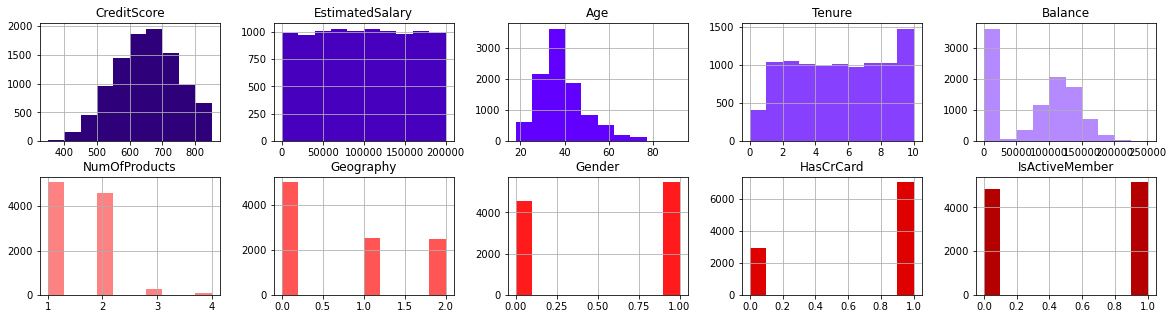

In [16]:
#Plot Histograms
fig, axs = plt.subplots(2, 5, figsize=(20, 5))

churn_df.hist(column="CreditScore", color='#2E007A', ax=axs[0, 0])
churn_df.hist(column="EstimatedSalary", color='#4700BD', ax=axs[0, 1])
churn_df.hist(column="Age", color='#6100FF', ax=axs[0, 2])
churn_df.hist(column="Tenure", color='#8840FF', ax=axs[0, 3])
churn_df.hist(column="Balance", color='#B589FF', ax=axs[0, 4])
churn_df.hist(column="NumOfProducts", color='#FF8282', ax=axs[1,0])
churn_df.hist(column="Geography", color='#FF5555', ax=axs[1, 1])
churn_df.hist(column="Gender", color='#FF1B1B', ax=axs[1, 2])
churn_df.hist(column="HasCrCard", color='#DF0000', ax=axs[1, 3])
churn_df.hist(column="IsActiveMember", color='#B40000', ax=axs[1, 4])

plt.savefig('Histograms.png')
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5904b03810>]],
      dtype=object)

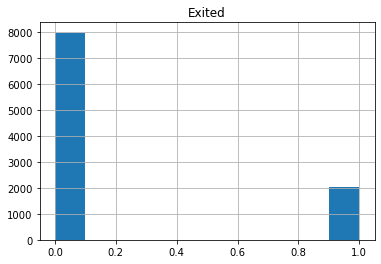

In [17]:
churn_df.hist(column="Exited")


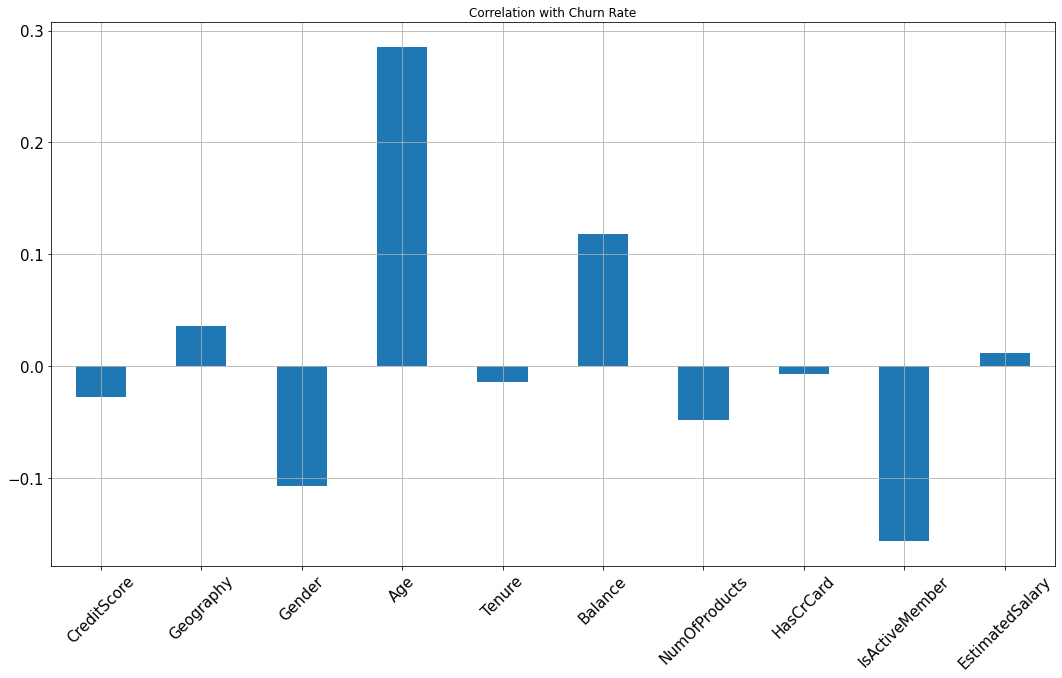

In [18]:
#Correlation Analysis
churn_df_no_label = churn_df.drop(columns=['Exited'])
correlations = churn_df_no_label.corrwith(churn_df.Exited)
correlations = correlations[correlations!=1]

correlations.plot.bar(
        figsize = (18, 10), 
        fontsize = 15,
        rot = 45, grid = True)
plt.title('Correlation with Churn Rate')
plt.savefig('Correlation with Churn Rate.png')
plt.show()

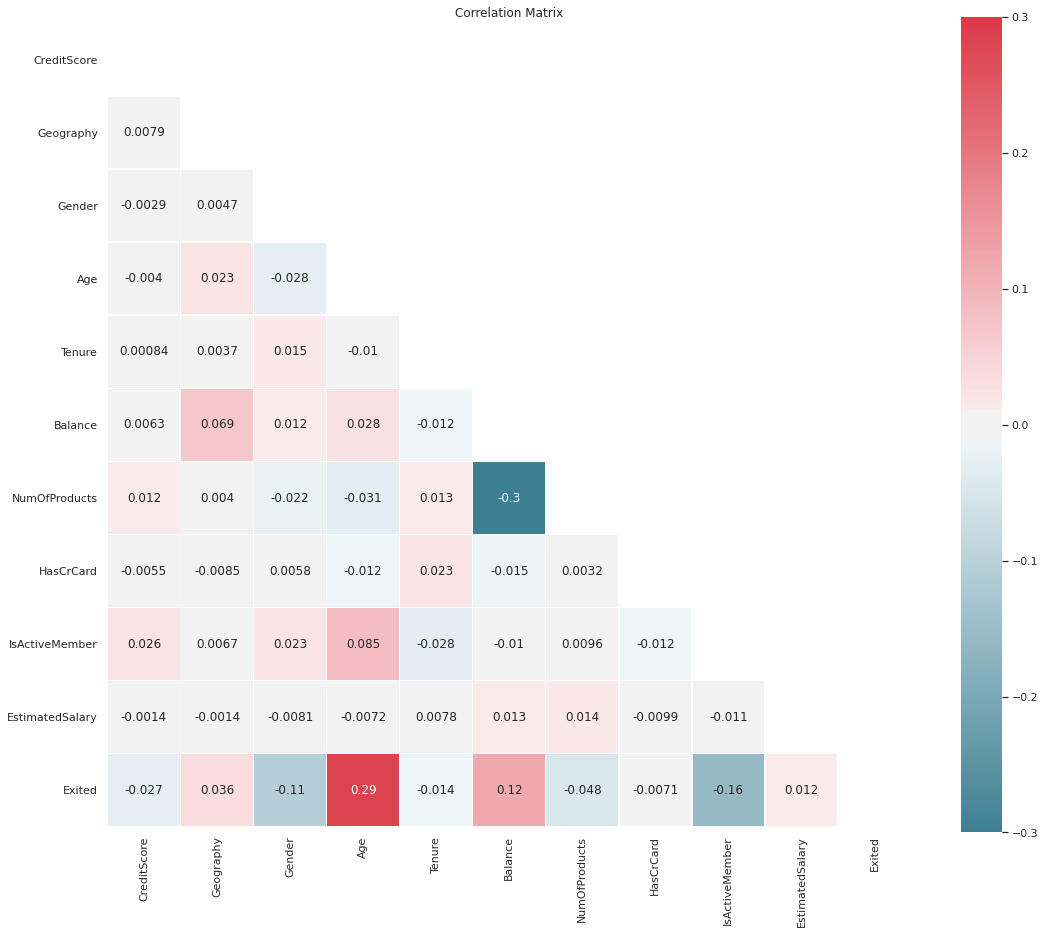

In [19]:
#Set and compute the Correlation Matrix
sns.set(style='white')
corr = churn_df.corr()
#Set up the matplotlib figure and a diverging colormap:
f, ax = plt.subplots(figsize=(18, 15))
cmap = sns.diverging_palette(220,
                             10,
                             as_cmap = True
                            )
#Create Mask
matrix_mask = np.zeros_like(corr, dtype=np.bool)
matrix_mask[np.triu_indices_from(matrix_mask)] = True
#Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr,
            annot = True,
            vmin = -0.3,
            vmax = 0.3,
            center = 0,
            cmap = cmap,
            square = True,
            linewidths = 0.5,
            mask = matrix_mask
           )
ax.set_title('Correlation Matrix')
plt.savefig('Correlation Matrix.png')
plt.show()
#Matrix shows the strongest positive correlation to 'Exiited' is with 'Age' (0.29). Score is considered to have weak correlation.

In [20]:
#Check multicollinearity using VIF
def calc_vif(X):
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i)
                  for i in range(X.shape[1])]
    return(vif)
vif_scores = calc_vif(churn_df)
vif_scores.to_csv('VIF Scores.csv')
vif_scores
#VIF scores are high for 'CreditScore' (>21) and 'Age' (>13)

variables        VIF
0       CreditScore  21.243043
1         Geography   1.817451
2            Gender   2.191102
3               Age  13.685859
4            Tenure   3.874058
5           Balance   2.678242
6     NumOfProducts   7.733164
7         HasCrCard   3.289635
8    IsActiveMember   2.151546
9   EstimatedSalary   3.886994
10           Exited   1.452807

In [21]:
#Drop 'Age' from dataframe to test VIF scores and drop 'CreditScore' from dataframe to test VIF scores.
churn_df_no_age = churn_df.drop(columns = 'Age')
churn_df_no_credit_scr = churn_df.drop(columns = 'CreditScore')
vif_scores_drop_credit_scr = calc_vif(churn_df_no_credit_scr)
vif_scores_drop_credit_scr.to_csv('VIF Scores - No Credit Score.csv')
vif_scores_drop_credit_scr
#Dropping 'Age' lowers the VIF score of 'CreditScore' from 21.2 (rounded) to 16.2 (rounded) (still high).
#Dropping 'CreditScore' lowers the VIF score of 'Age' from 13.7 (rounded) to 10.4 (rounded) (acceptable).
#From the VIF scores after dropping the each of the variables seperately, 'CreditScore' will be removed as it has the highest VIF score (>21) and with it's removal, the VIF score for 'Age' is lowered to an acceptable score.

variables        VIF
0        Geography   1.804299
1           Gender   2.150866
2              Age  10.441151
3           Tenure   3.706696
4          Balance   2.498008
5    NumOfProducts   6.389993
6        HasCrCard   3.169460
7   IsActiveMember   2.133063
8  EstimatedSalary   3.716903
9           Exited   1.445618

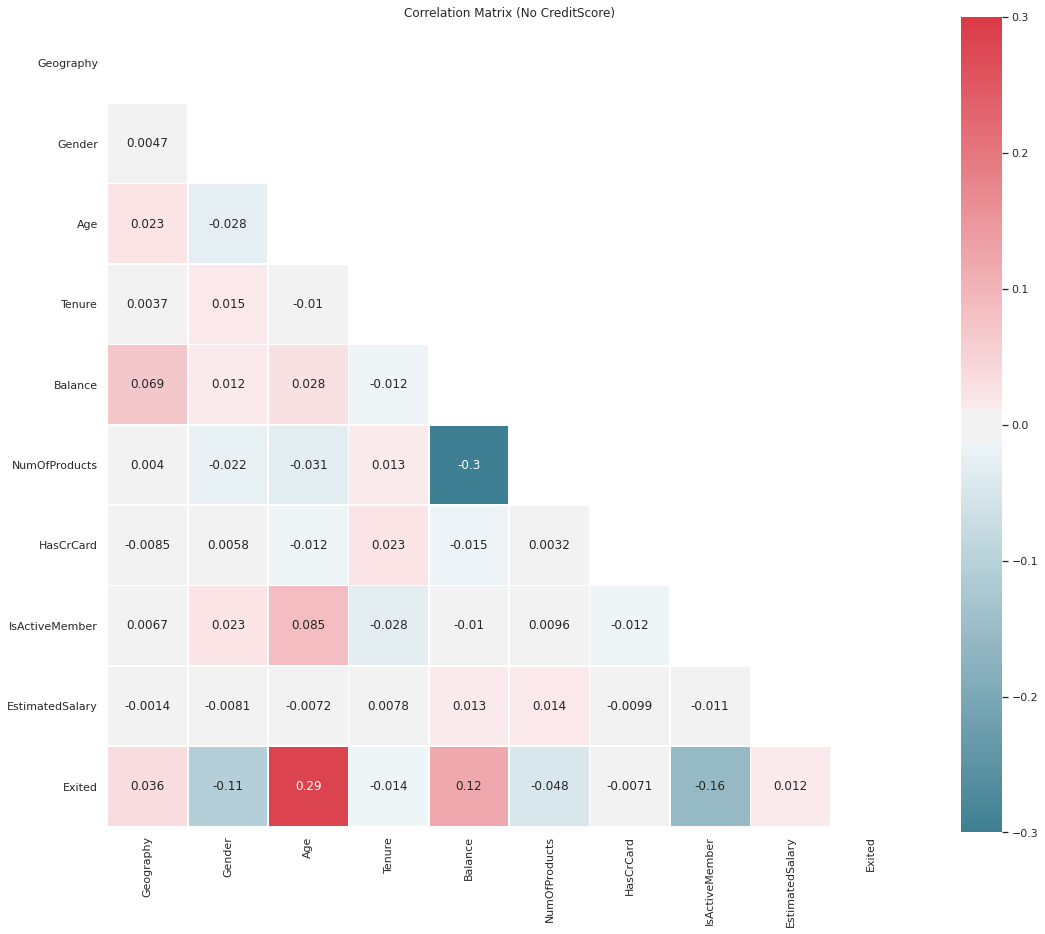

In [22]:
#Set and compute the Correlation Matrix with 'CreditScore' dropped from dataframe
sns.set(style='white')
corr_no_credit_scr = churn_df_no_credit_scr.corr()
#Set up the matplotlib figure and a diverging colormap:
f, ax = plt.subplots(figsize=(18, 15))
cmap = sns.diverging_palette(220,
                             10,
                             as_cmap = True
                            )
#Create Mask
matrix_mask = np.zeros_like(corr_no_credit_scr, dtype=np.bool)
matrix_mask[np.triu_indices_from(matrix_mask)] = True
#Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_no_credit_scr,
            annot = True,
            vmin = -0.3,
            vmax = 0.3,
            center = 0,
            cmap = cmap,
            square = True,
            linewidths = 0.5,
            mask = matrix_mask
           )
ax.set_title('Correlation Matrix (No CreditScore)')
plt.savefig('Correlation Matrix - No Credit Score.png')
plt.show()

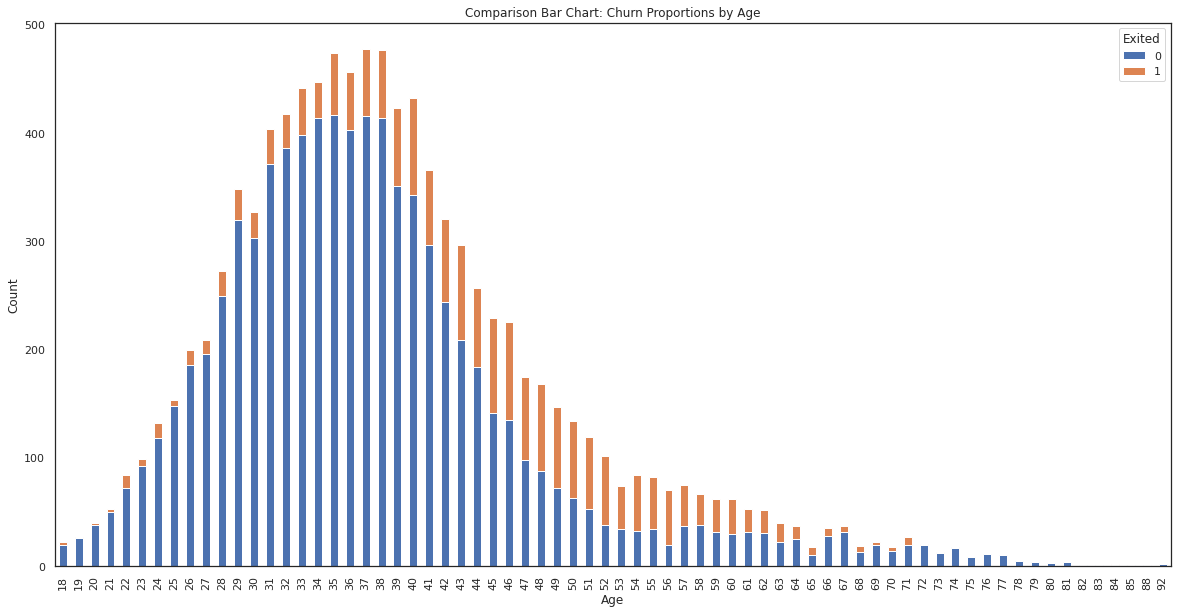

In [23]:
#Visualize relationship between 'Age' and 'Exited' (correlation score of 0.29)
int_churn_contingency = pd.crosstab(churn_df_no_credit_scr['Age'], churn_df_no_credit_scr['Exited'])
int_churn_contingency.plot(figsize = (20,10),
                           kind = 'bar',
                           stacked = 'true',
                           title = "Comparison Bar Chart: Churn Proportions by Age"
                          )
plt.xlabel('Age')
plt.ylabel('Count')
plt.savefig('Comparison Bar Chart: Churn Proportions by Age.png')
plt.show()

In [24]:
#Sampling Strategies

#SMOTE Sampling
#set parameters for and run SMOTE
seed_sm = 100
k_sm = 5
x_sm = churn_df_no_credit_scr.loc[:, churn_df_no_credit_scr.columns != 'Exited']
y_sm = churn_df_no_credit_scr.Exited
sm = SMOTE(sampling_strategy = 'auto', k_neighbors = k_sm, random_state = seed_sm)
x_res_sm, y_res_sm = sm.fit_resample(x_sm, y_sm)
#Join x & y dataframes
churn_df_smote = pd.concat([pd.DataFrame(x_res_sm), pd.DataFrame(y_res_sm)], axis=1)

#Random Under Sampling
#setting variable for number of churned customers
minority_class_length=len(churn_df_no_credit_scr[churn_df_no_credit_scr['Exited'] ==1])
#creating array of positions of non-churned customers
majority_class_indices=churn_df_no_credit_scr[churn_df_no_credit_scr['Exited'] ==0].index
#creating array of random positions of non-churned customers
random_majority_indices=np.random.choice(majority_class_indices, minority_class_length, replace=False)
#creating array of positions of churned customers
minority_class_indices=churn_df_no_credit_scr[churn_df_no_credit_scr['Exited'] == 1].index
#creating array of positions of both churned and non-churned customers
under_sample_indices=np.concatenate([minority_class_indices, random_majority_indices])
#creating new undersampled dataframe
churn_df_under=churn_df_no_credit_scr.loc[under_sample_indices]

#Over & Under Sampling - Combination of SMOTE Sampling and Random Under Sampling
#Set seed
seed_ou = 100
#Using 'x_sm' and 'y_sm' from SMOTE Sampling, apply RandomUnderSampler
random_us = RandomUnderSampler(random_state = seed_ou)
x_ou, y_ou = random_us.fit_resample(x_sm, y_sm)
#Join x & y dataframes
churn_df_ou = pd.concat([pd.DataFrame(x_ou), pd.DataFrame(y_ou)], axis=1)

#Compare shape of original dataframe and sampled dataframes (SMOTE Sampling, Random Under Sampling, Combination of SMOTE & Random Under Sampling)
#Create dataframe to show shape of dataframes - Original, SMOTE Sampling, Under Sampling, Over&Under Sampling
df_shapes = pd.DataFrame(np.array([
    ['Cleaned Dataset',churn_df_no_credit_scr.shape],
    ['SMOTE Sampling', churn_df_smote.shape],
    ['Under Sampling', churn_df_under.shape],
    ['Over & Under Sampling', churn_df_ou.shape]]),
                          columns = ['DataFrame', 'Shape'])
df_shapes.to_csv('Sampling - Dataframe Shapes.csv')
df_shapes

DataFrame        Shape
0        Cleaned Dataset  (10000, 10)
1         SMOTE Sampling  (15926, 10)
2         Under Sampling   (4074, 10)
3  Over & Under Sampling   (4074, 10)

In [25]:
#As Under Sampling Dataframe and Over&Under Sampling Dataframe have the same shape, compare the two
churn_df_under.equals(churn_df_ou)

False

In [26]:
#Classification - Data Splitting

#Split data into dependent and independent varialbes - 'Exited' as target
target='Exited'
#SMOTE Sampling
x_sm=churn_df_smote.loc[:, churn_df_smote.columns != target]
y_sm=churn_df_smote.loc[:, churn_df_smote.columns == target]
#Under Sampling
x_under=churn_df_under.loc[:, churn_df_under.columns != target]
y_under=churn_df_under.loc[:, churn_df_under.columns == target]
#Over&Under Sampling
x_ou=churn_df_ou.loc[:, churn_df_ou.columns != target]
y_ou=churn_df_ou.loc[:, churn_df_ou.columns == target]

#Split into Test and Train data
tt_seed = 50
#SMOTE Sampling
x_train_sm, x_test_sm, y_train_sm, y_test_sm = train_test_split(x_sm,
                                                                y_sm,
                                                                test_size=0.33,
                                                                random_state = tt_seed,
                                                                stratify=y_sm
                                                               )
#Under Sampling
x_train_under, x_test_under, y_train_under, y_test_under = train_test_split(x_under,
                                                                            y_under,
                                                                            test_size=0.33,
                                                                            random_state = tt_seed,
                                                                            stratify=y_under
                                                                           )
#Over&Under Sampling
x_train_ou, x_test_ou, y_train_ou, y_test_ou = train_test_split(x_ou,
                                                                y_ou,
                                                                test_size=0.33,
                                                                random_state = tt_seed,
                                                                stratify=y_ou
                                                                )

#Create dataframe to show shape of Test and Train Dataframes - Original, SMOTE Sampling, Under Sampling, Over&Under Sampling
train_test_df_shapes = pd.DataFrame(np.array([
    ['SMOTE Sampling', x_train_sm.shape, x_test_sm.shape, y_train_sm.shape, y_test_sm.shape],
    ['Under Sampling', x_train_under.shape, x_test_under.shape, y_train_under.shape, y_test_under.shape],
    ['Over & Under Sampling', x_train_ou.shape, x_test_ou.shape, y_train_ou.shape, y_test_ou.shape]]),
                          columns = ['DataFrame', 'Shape of X Train', 'Shape of X Test', 'Shape of Y Train', 'Shape of Y Test'])
train_test_df_shapes.to_csv('Data Splitting - Train Test Shapes.csv')
train_test_df_shapes

DataFrame Shape of X Train Shape of X Test Shape of Y Train  \
0         SMOTE Sampling       (10670, 9)       (5256, 9)       (10670, 1)   
1         Under Sampling        (2729, 9)       (1345, 9)        (2729, 1)   
2  Over & Under Sampling        (2729, 9)       (1345, 9)        (2729, 1)   

  Shape of Y Test  
0       (5256, 1)  
1       (1345, 1)  
2       (1345, 1)

In [27]:
#Classification - Classification Models

#logistic Regression

#Fit LR to the Training Sets
lr_clf = LogisticRegression(random_state = 5)
#SMOTE Sampling
lr_clf_sm = lr_clf
lr_clf_sm.fit(x_train_sm, y_train_sm.values.ravel())
#Under Sampling
lr_clf_under = lr_clf
lr_clf_under.fit(x_train_under, y_train_under.values.ravel())
#Over&Under Sampling
lr_clf_ou = lr_clf
lr_clf_ou.fit(x_train_ou, y_train_ou.values.ravel())

#Predict the Test set results
#SMOTE Sampling
lr_y_pred_sm = lr_clf_sm.predict(x_test_sm)
#Under Sampling
lr_y_pred_under = lr_clf_under.predict(x_test_under)
#Over&Under Sampling
lr_y_pred_ou = lr_clf_ou.predict(x_test_ou)

#Evaluation Dataframe - Accuracy, Precision, Recall, F1 Score
#SMOTE Sampling
lr_acc_sm = accuracy_score(y_test_sm, lr_y_pred_sm)
lr_prec_sm = precision_score(y_test_sm, lr_y_pred_sm)
lr_rec_sm = recall_score(y_test_sm, lr_y_pred_sm)
lr_f1_sm = f1_score(y_test_sm, lr_y_pred_sm)
#Under Sampling
lr_acc_under = accuracy_score(y_test_under, lr_y_pred_under)
lr_prec_under = precision_score(y_test_under, lr_y_pred_under)
lr_rec_under = recall_score(y_test_under, lr_y_pred_under)
lr_f1_under = f1_score(y_test_under, lr_y_pred_under)
#Over&Under Sampling
lr_acc_ou = accuracy_score(y_test_ou, lr_y_pred_ou)
lr_prec_ou = precision_score(y_test_ou, lr_y_pred_ou)
lr_rec_ou = recall_score(y_test_ou, lr_y_pred_ou)
lr_f1_ou = f1_score(y_test_ou, lr_y_pred_ou)

#Print Logistic Regression scoreséEvaluation dataframe
lr_results = pd.DataFrame(np.array([
    ['Logistic Regression SMOTE Sampling', lr_acc_sm, lr_prec_sm, lr_rec_sm, lr_f1_sm],
    ['Logistic Regression Under Sampling', lr_acc_under, lr_prec_under, lr_rec_under, lr_f1_under],
    ['Logistic Regression Over & Under Sampling', lr_acc_ou, lr_prec_ou, lr_rec_ou, lr_f1_ou]]),
                          columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
lr_results.to_csv('Classification - LR Results.csv')
lr_results

Model            Accuracy  \
0         Logistic Regression SMOTE Sampling  0.5639269406392694   
1         Logistic Regression Under Sampling  0.5598513011152416   
2  Logistic Regression Over & Under Sampling  0.5591078066914498   

            Precision              Recall            F1 Score  
0  0.5469536053661264  0.7446727549467276  0.6306799871092492  
1   0.543010752688172  0.7514880952380952   0.630461922596754  
2  0.5424274973147154  0.7514880952380952   0.630068621334997

In [28]:
#Logistic Regression - Evaluate the Results
#Confusion Matrix
#Generating confusion matrix values (True Positive, False Positive, True Negative, and False Negative)
#SMOTE Sampling
lr_tn_sm, lr_fp_sm, lr_fn_sm, lr_tp_sm = confusion_matrix(y_test_sm, lr_y_pred_sm).ravel()
#Under Sampling
lr_tn_under, lr_fp_under, lr_fn_under, lr_tp_under = confusion_matrix(y_test_under, lr_y_pred_under).ravel()
#Over&Under Sampling
lr_tn_ou, lr_fp_ou, lr_fn_ou, lr_tp_ou = confusion_matrix(y_test_ou, lr_y_pred_ou).ravel()

lr_confusion_matrix = pd.DataFrame(np.array([
    ['Logistic Regression SMOTE Sampling', lr_tp_sm, lr_fp_sm, lr_tn_sm, lr_fn_sm],
    ['Logistic Regression Under Sampling', lr_tp_under, lr_fp_under, lr_tn_under, lr_fn_under],
    ['Logistic Regression Over & Under Sampling', lr_tp_ou, lr_fp_ou, lr_tn_ou, lr_fn_ou]]),
                          columns = ['Model', 'True Positives', 'False Positives', 'True Negatives', 'False Negatives'])
lr_confusion_matrix.to_csv('Classification - LR Confusion Matrix.csv')
lr_confusion_matrix

Model True Positives False Positives  \
0         Logistic Regression SMOTE Sampling           1957            1621   
1         Logistic Regression Under Sampling            505             425   
2  Logistic Regression Over & Under Sampling            505             426   

  True Negatives False Negatives  
0           1007             671  
1            248             167  
2            247             167

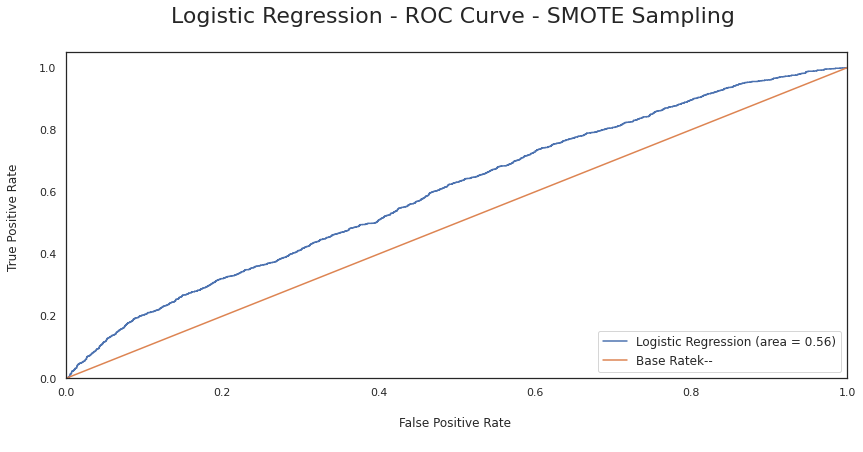

In [29]:
#Visualize AUC-ROC Curve - SMOTE Sampling
lr_probas_sm = lr_clf_sm.predict_proba(x_test_sm)[:, 1]
lr_classifier_roc_auc_sm = accuracy_score(y_test_sm, lr_y_pred_sm)
lr_fpr_sm, lr_tpr_sm, lr_thresholds_sm = roc_curve(y_test_sm, lr_probas_sm)
plt.figure(figsize=(14, 6))

# Plot Logistic Regression ROC
plt.plot(lr_fpr_sm, lr_tpr_sm, label='Logistic Regression (area = %0.2f)' % lr_classifier_roc_auc_sm)

# Plot Base Rate ROC
plt.plot([0,1], [0,1],label='Base Rate' 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.ylabel('True Positive Rate \n',horizontalalignment="center",
fontstyle = "normal", fontsize = "medium", 
fontfamily = "sans-serif")
plt.xlabel('\nFalse Positive Rate \n',horizontalalignment="center",
fontstyle = "normal", fontsize = "medium", 
fontfamily = "sans-serif")
plt.title('Logistic Regression - ROC Curve - SMOTE Sampling \n',horizontalalignment="center", 
fontstyle = "normal", fontsize = "22", 
fontfamily = "sans-serif")
plt.legend(loc="lower right", fontsize = "medium")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")
plt.savefig('Logistic Regression - ROC Curve - SMOTE Sampling.png')
plt.show()

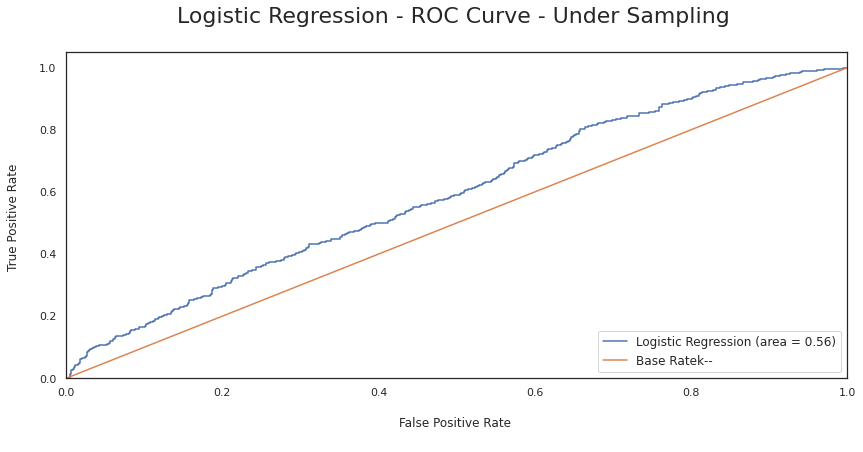

In [30]:
#Visualize AUC-ROC Curve - Under Sampling
lr_probas_under = lr_clf_under.predict_proba(x_test_under)[:, 1]
lr_classifier_roc_auc_under = accuracy_score(y_test_under, lr_y_pred_under)
lr_fpr_under, lr_tpr_under, lr_thresholds_under = roc_curve(y_test_under, lr_probas_under)
plt.figure(figsize=(14, 6))

# Plot Logistic Regression ROC
plt.plot(lr_fpr_under, lr_tpr_under, label='Logistic Regression (area = %0.2f)' % lr_classifier_roc_auc_under)

# Plot Base Rate ROC
plt.plot([0,1], [0,1],label='Base Rate' 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.ylabel('True Positive Rate \n',horizontalalignment="center",
fontstyle = "normal", fontsize = "medium", 
fontfamily = "sans-serif")
plt.xlabel('\nFalse Positive Rate \n',horizontalalignment="center",
fontstyle = "normal", fontsize = "medium", 
fontfamily = "sans-serif")
plt.title('Logistic Regression - ROC Curve - Under Sampling \n',horizontalalignment="center", 
fontstyle = "normal", fontsize = "22", 
fontfamily = "sans-serif")
plt.legend(loc="lower right", fontsize = "medium")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")
plt.savefig('Logistic Regression - ROC Curve - Under Sampling.png')
plt.show()

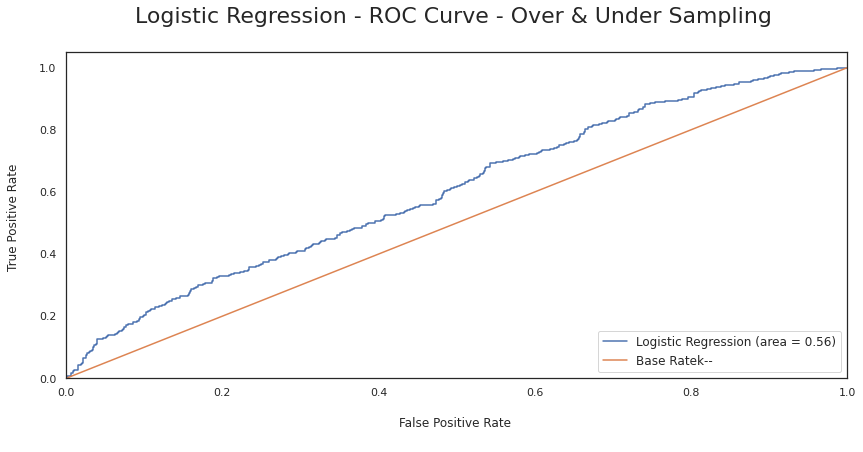

In [31]:
#Visualize AUC-ROC Curve - Over&Under Sampling
lr_probas_ou = lr_clf_ou.predict_proba(x_test_ou)[:, 1]
lr_classifier_roc_auc_ou = accuracy_score(y_test_ou, lr_y_pred_ou)
lr_fpr_ou, lr_tpr_ou, lr_thresholds_ou = roc_curve(y_test_ou, lr_probas_ou)
plt.figure(figsize=(14, 6))

# Plot Logistic Regression ROC
plt.plot(lr_fpr_ou, lr_tpr_ou, label='Logistic Regression (area = %0.2f)' % lr_classifier_roc_auc_ou)

# Plot Base Rate ROC
plt.plot([0,1], [0,1],label='Base Rate' 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.ylabel('True Positive Rate \n',horizontalalignment="center",
fontstyle = "normal", fontsize = "medium", 
fontfamily = "sans-serif")
plt.xlabel('\nFalse Positive Rate \n',horizontalalignment="center",
fontstyle = "normal", fontsize = "medium", 
fontfamily = "sans-serif")
plt.title('Logistic Regression - ROC Curve - Over & Under Sampling \n',horizontalalignment="center", 
fontstyle = "normal", fontsize = "22", 
fontfamily = "sans-serif")
plt.legend(loc="lower right", fontsize = "medium")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")
plt.savefig('Logistic Regression - ROC Curve - Over & Under Sampling.png')
plt.show()

In [32]:
#Decision Tree

#Create Decision Tree Classifier
dt_clf = DecisionTreeClassifier(max_depth = 7,
                                criterion = 'entropy',
                                random_state = 5)
#'max_depth' set to 7 after testing multiple depths (1-25)
#SMOTE Sampling
dt_clf_sm = dt_clf
dt_clf_sm.fit(x_train_sm, y_train_sm)
y_pred_dt_sm = dt_clf_sm.predict(x_test_sm)
#Under Sampling
dt_clf_under = dt_clf
dt_clf_under.fit(x_train_under, y_train_under)
y_pred_dt_under = dt_clf_under.predict(x_test_under)
#Over&Under Sampling
dt_clf_ou = dt_clf
dt_clf_ou.fit(x_train_ou, y_train_ou)
y_pred_dt_ou = dt_clf_ou.predict(x_test_ou)

#Evaluate the Results
#SMOTE Sampling
dt_acc_sm = accuracy_score(y_test_sm, y_pred_dt_sm)
dt_prec_sm = precision_score(y_test_sm, y_pred_dt_sm)
dt_rec_sm = recall_score(y_test_sm, y_pred_dt_sm)
dt_f1_sm = f1_score(y_test_sm, y_pred_dt_sm)
#Under Sampling
dt_acc_under = accuracy_score(y_test_under, y_pred_dt_under)
dt_prec_under = precision_score(y_test_under, y_pred_dt_under)
dt_rec_under = recall_score(y_test_under, y_pred_dt_under)
dt_f1_under = f1_score(y_test_under, y_pred_dt_under)
#Over&Under Sampling
dt_acc_sm = accuracy_score(y_test_ou, y_pred_dt_ou)
dt_prec_sm = precision_score(y_test_ou, y_pred_dt_ou)
dt_rec_sm = recall_score(y_test_ou, y_pred_dt_ou)
dt_f1_sm = f1_score(y_test_ou, y_pred_dt_ou)

#Print Decision Tree scores
dt_results = pd.DataFrame(np.array([
    ['Decision Tree SMOTE Sampling', dt_acc_sm, dt_prec_sm, dt_rec_sm, dt_f1_sm],
    ['Decision Tree Under Sampling', dt_acc_under, dt_prec_under, dt_rec_under, dt_f1_under],
    ['Decision Tree Over & Under Sampling', dt_acc_sm, dt_prec_sm, dt_rec_sm, dt_f1_sm]]),
                          columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
dt_results.to_csv('Classification - DT Results.csv')
dt_results

Model            Accuracy  \
0         Decision Tree SMOTE Sampling  0.7665427509293681   
1         Decision Tree Under Sampling  0.7494423791821562   
2  Decision Tree Over & Under Sampling  0.7665427509293681   

            Precision              Recall            F1 Score  
0  0.7728658536585366  0.7544642857142857  0.7635542168674699  
1  0.7355836849507735  0.7782738095238095  0.7563268257411424  
2  0.7728658536585366  0.7544642857142857  0.7635542168674699

In [33]:
#Decision Tree - Evaluate the Results
#Confusion Matrix
#Generating confusion matrix values (True Positive, False Positive, True Negative, and False Negative)
#SMOTE Sampling
dt_tn_sm, dt_fp_sm, dt_fn_sm, dt_tp_sm = confusion_matrix(y_test_sm, y_pred_dt_sm).ravel()
#Under Sampling
dt_tn_under, dt_fp_under, dt_fn_under, dt_tp_under = confusion_matrix(y_test_under, y_pred_dt_under).ravel()
#Over&Under Sampling
dt_tn_ou, dt_fp_ou, dt_fn_ou, dt_tp_ou = confusion_matrix(y_test_ou, y_pred_dt_ou).ravel()

dt_confusion_matrix = pd.DataFrame(np.array([
    ['Decision Tree SMOTE Sampling', dt_tp_sm, dt_fp_sm, dt_tn_sm, dt_fn_sm],
    ['Decision Tree Under Sampling', dt_tp_under, dt_fp_under, dt_tn_under, dt_fn_under],
    ['Decision Tree Over & Under Sampling', dt_tp_ou, dt_fp_ou, dt_tn_ou, dt_fn_ou]]),
                          columns = ['Model', 'True Positives', 'False Positives', 'True Negatives', 'False Negatives'])
dt_confusion_matrix.to_csv('Classification - DT Confusion Matrix.csv')
dt_confusion_matrix

Model True Positives False Positives  \
0         Decision Tree SMOTE Sampling           2073             441   
1         Decision Tree Under Sampling            523             188   
2  Decision Tree Over & Under Sampling            507             149   

  True Negatives False Negatives  
0           2187             555  
1            485             149  
2            524             165

In [34]:
#While all sample data produced similar scores, SMOTE and Over & Under sampling methods produce the best results.

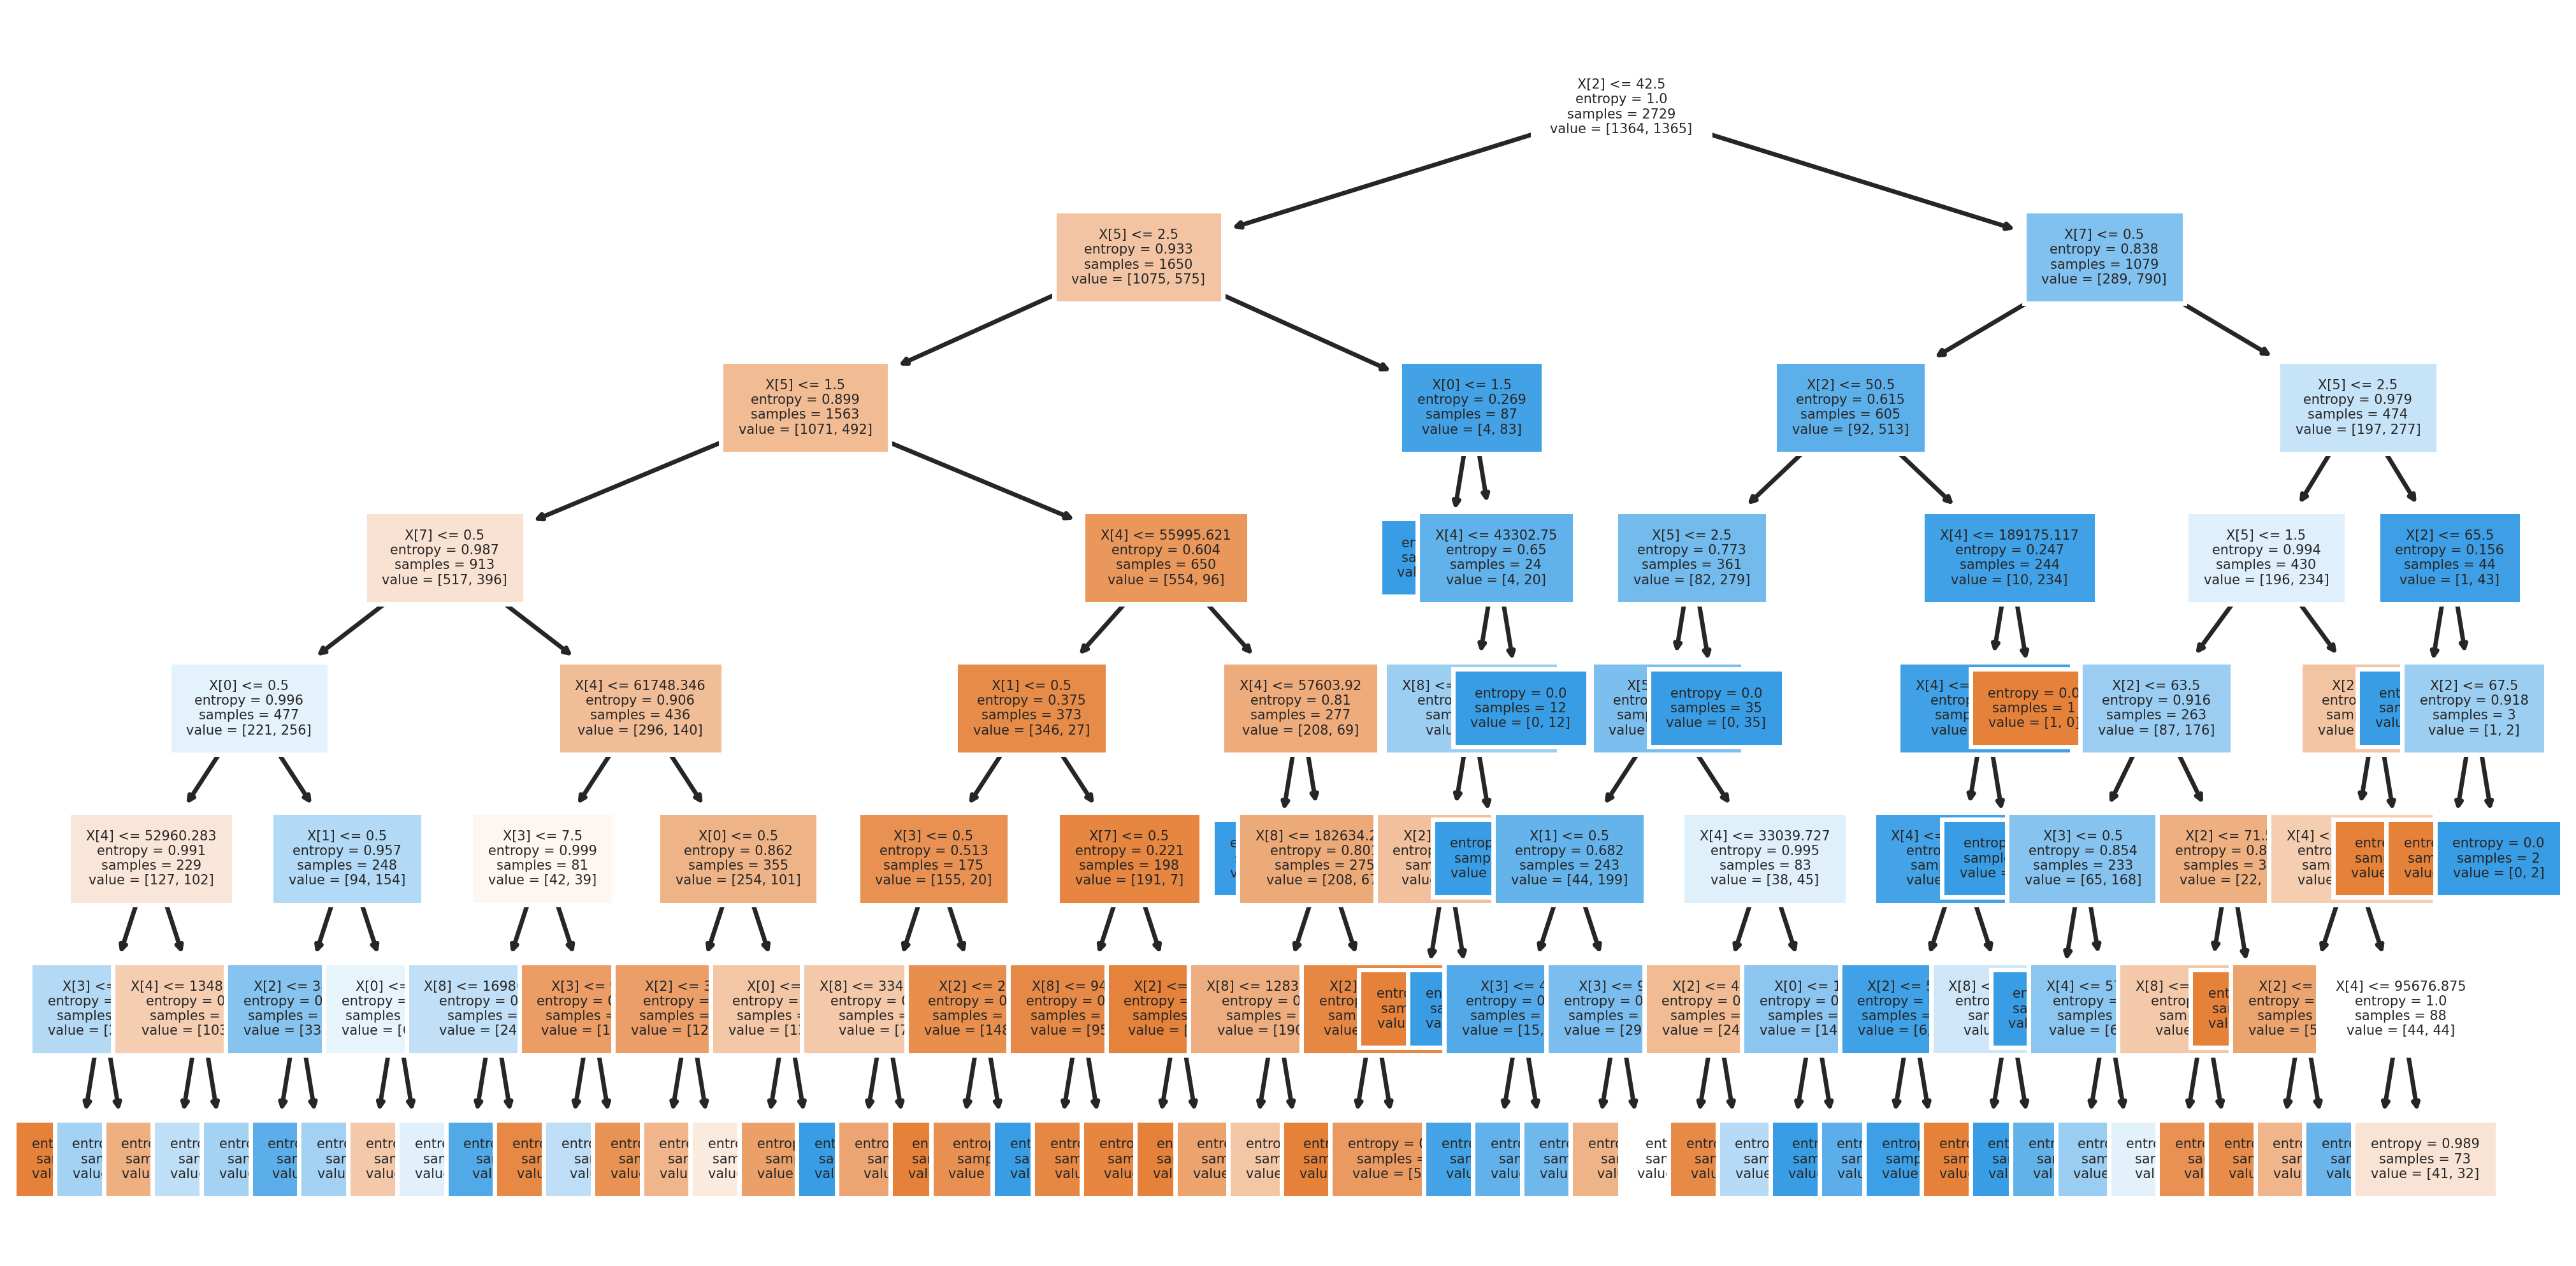

In [35]:
#Visualize Decision Tree for SMOTE Sampling (and produce PNG file)
fig, axes = plt.subplots(figsize = (10,5), dpi=500)
tree.plot_tree(dt_clf_sm,
               fontsize=3,
               filled = True);
fig.savefig('SMOTE_DT.png')

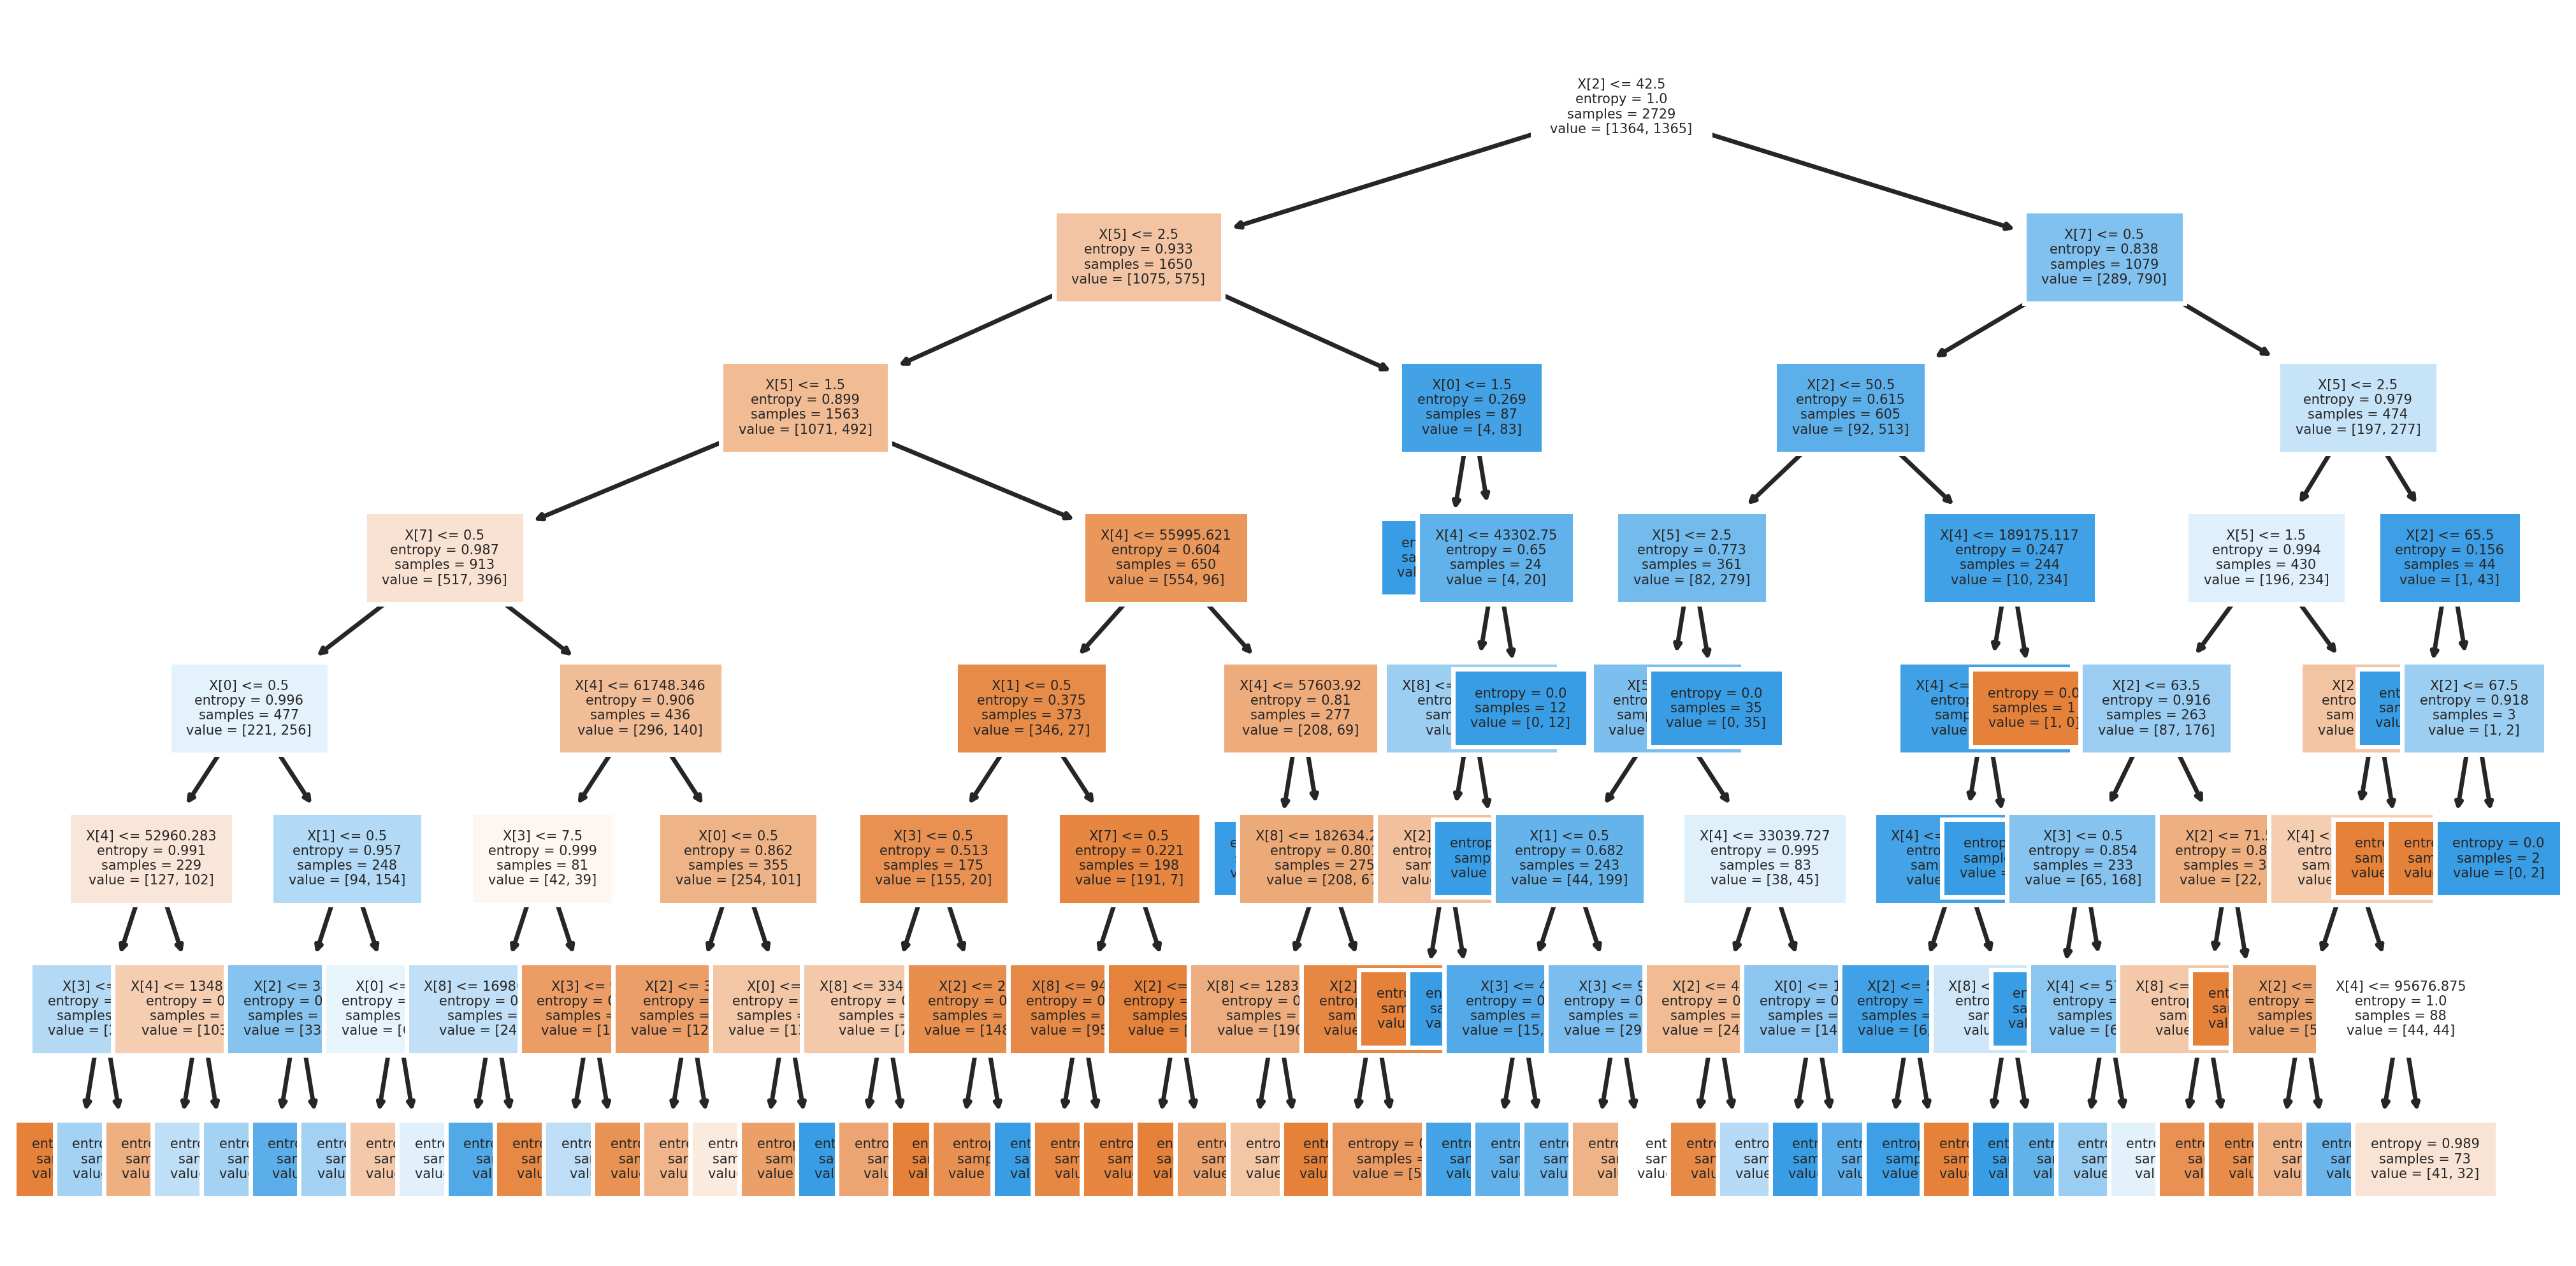

In [36]:
#Visualize Decision Tree for Over & Under Sampling (and produce PNG file)
fig, axes = plt.subplots(figsize = (10,5), dpi=500)
tree.plot_tree(dt_clf_ou,
               fontsize=3,
               filled = True);
fig.savefig('OverUnder_DT.png')

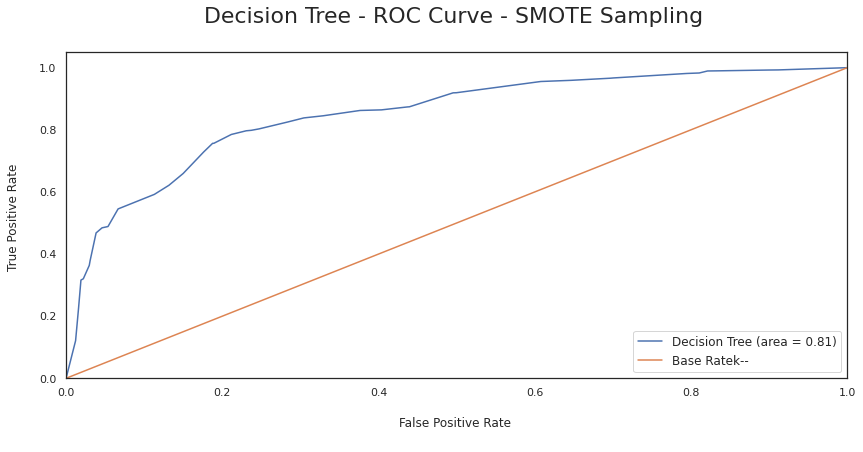

In [37]:
#Visualize AUC-ROC Curve - SMOTE Sampling
dt_probas_sm = dt_clf_sm.predict_proba(x_test_sm)[:, 1]
dt_classifier_roc_auc_sm = accuracy_score(y_test_sm, y_pred_dt_sm)
dt_fpr_sm, dt_tpr_sm, dt_thresholds_sm = roc_curve(y_test_sm, dt_probas_sm)
plt.figure(figsize=(14, 6))

# Plot Decision Tree ROC
plt.plot(dt_fpr_sm, dt_tpr_sm, label='Decision Tree (area = %0.2f)' % dt_classifier_roc_auc_sm)

# Plot Base Rate ROC
plt.plot([0,1], [0,1],label='Base Rate' 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.ylabel('True Positive Rate \n',horizontalalignment="center",
fontstyle = "normal", fontsize = "medium", 
fontfamily = "sans-serif")
plt.xlabel('\nFalse Positive Rate \n',horizontalalignment="center",
fontstyle = "normal", fontsize = "medium", 
fontfamily = "sans-serif")
plt.title('Decision Tree - ROC Curve - SMOTE Sampling \n',horizontalalignment="center", 
fontstyle = "normal", fontsize = "22", 
fontfamily = "sans-serif")
plt.legend(loc="lower right", fontsize = "medium")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")
plt.savefig('Decision Tree - ROC Curve - SMOTE Sampling.png')
plt.show()

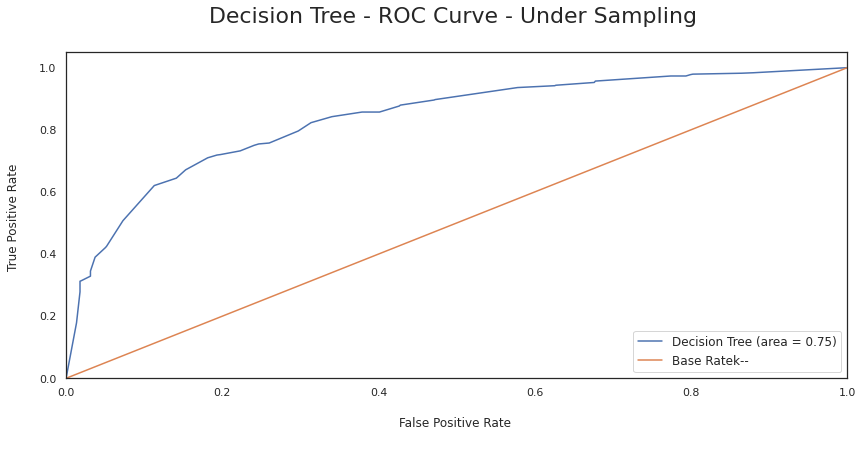

In [38]:
#Visualize AUC-ROC Curve - Under Sampling
dt_probas_under = dt_clf_under.predict_proba(x_test_under)[:, 1]
dt_classifier_roc_auc_under = accuracy_score(y_test_under, y_pred_dt_under)
dt_fpr_under, dt_tpr_under, dt_thresholds_under = roc_curve(y_test_under, dt_probas_under)
plt.figure(figsize=(14, 6))

# Plot Decision Tree ROC
plt.plot(dt_fpr_under, dt_tpr_under, label='Decision Tree (area = %0.2f)' % dt_classifier_roc_auc_under)

# Plot Base Rate ROC
plt.plot([0,1], [0,1],label='Base Rate' 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.ylabel('True Positive Rate \n',horizontalalignment="center",
fontstyle = "normal", fontsize = "medium", 
fontfamily = "sans-serif")
plt.xlabel('\nFalse Positive Rate \n',horizontalalignment="center",
fontstyle = "normal", fontsize = "medium", 
fontfamily = "sans-serif")
plt.title('Decision Tree - ROC Curve - Under Sampling \n',horizontalalignment="center", 
fontstyle = "normal", fontsize = "22", 
fontfamily = "sans-serif")
plt.legend(loc="lower right", fontsize = "medium")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")
plt.savefig('Decision Tree - ROC Curve - Under Sampling.png')
plt.show()

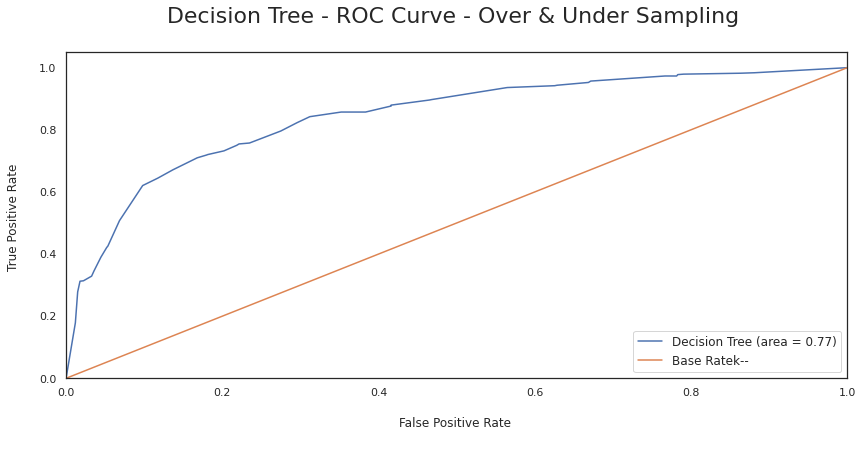

In [39]:
#Visualize AUC-ROC Curve - Over & Under Sampling
dt_probas_ou = dt_clf_ou.predict_proba(x_test_ou)[:, 1]
dt_classifier_roc_auc_ou = accuracy_score(y_test_ou, y_pred_dt_ou)
dt_fpr_ou, dt_tpr_ou, dt_thresholds_ou = roc_curve(y_test_ou, dt_probas_ou)
plt.figure(figsize=(14, 6))

# Plot Decision Tree ROC
plt.plot(dt_fpr_ou, dt_tpr_ou, label='Decision Tree (area = %0.2f)' % dt_classifier_roc_auc_ou)

# Plot Base Rate ROC
plt.plot([0,1], [0,1],label='Base Rate' 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.ylabel('True Positive Rate \n',horizontalalignment="center",
fontstyle = "normal", fontsize = "medium", 
fontfamily = "sans-serif")
plt.xlabel('\nFalse Positive Rate \n',horizontalalignment="center",
fontstyle = "normal", fontsize = "medium", 
fontfamily = "sans-serif")
plt.title('Decision Tree - ROC Curve - Over & Under Sampling \n',horizontalalignment="center", 
fontstyle = "normal", fontsize = "22", 
fontfamily = "sans-serif")
plt.legend(loc="lower right", fontsize = "medium")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")
plt.savefig('Decision Tree - ROC Curve - Over & Under Sampling.png')
plt.show()

In [40]:
#Random Forest Classification

#Configure parameter options for finding best parameters/estimator
param_grid = {'bootstrap': [True, False],
              'criterion': ['gini', 'entropy'],
              'max_depth': [3, 5, 10],
              'min_samples_leaf': [3, 4, 5],
              'min_samples_split': [2, 5, 10]
             }
base_estimator = RandomForestClassifier(random_state=0)

#Configure for testing on different samples
#SMOTE Sampling
x_sm, y_sm = make_classification(n_samples=1000, random_state=0)
sh_sm = HalvingGridSearchCV(base_estimator, param_grid, cv=5,
                         factor=2, resource='n_estimators',
                         max_resources=30).fit(x_sm, y_sm)
#Under Sampling
x_under, y_under = make_classification(n_samples=1000, random_state=0)
sh_under = HalvingGridSearchCV(base_estimator, param_grid, cv=5,
                         factor=2, resource='n_estimators',
                         max_resources=30).fit(x_under, y_under)
#Over&Under Sampling
x_ou, y_ou = make_classification(n_samples=1000, random_state=0)
sh_ou = HalvingGridSearchCV(base_estimator, param_grid, cv=5,
                         factor=2, resource='n_estimators',
                         max_resources=30).fit(x_ou, y_ou)

In [41]:
#SMOTE Sampling Results
sh_sm.best_estimator_

RandomForestClassifier(bootstrap=False, max_depth=10, min_samples_leaf=4,
                       min_samples_split=5, n_estimators=16, random_state=0)

In [42]:
#Under Sampling Results
sh_under.best_estimator_

RandomForestClassifier(bootstrap=False, max_depth=10, min_samples_leaf=4,
                       min_samples_split=5, n_estimators=16, random_state=0)

In [43]:
#Over&Under Sampling Results
sh_ou.best_estimator_

RandomForestClassifier(bootstrap=False, max_depth=10, min_samples_leaf=4,
                       min_samples_split=5, n_estimators=16, random_state=0)

In [44]:
#Random Forest Classifier
#Parameters from GridSearchCV - 'bootstrap': False, 'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 16 (both SMOTE and Under sampling)
rf_clf_best_param = RandomForestClassifier(bootstrap = False,
                                           max_depth = 10,
                                           min_samples_leaf = 4,
                                           min_samples_split = 5,
                                           n_estimators = 16,
                                           criterion = 'gini',
                                           random_state=0
                                          )
#Fitting Random Forest Classifier using best parameters
#SMOTE Sampling
rf_clf_best_param_sm = rf_clf_best_param
rf_clf_best_param_sm.fit(x_train_sm, y_train_sm.values.ravel())
#Under Sampling
rf_clf_best_param_under = rf_clf_best_param
rf_clf_best_param_under.fit(x_train_under, y_train_under.values.ravel())
#Over&Under Sampling
rf_clf_best_param_ou = rf_clf_best_param
rf_clf_best_param_ou.fit(x_train_ou, y_train_ou.values.ravel())

RandomForestClassifier(bootstrap=False, max_depth=10, min_samples_leaf=4,
                       min_samples_split=5, n_estimators=16, random_state=0)

In [45]:
#Make predictions with test sets - Random Forest
#SMOTE Sampling
y_pred_rf_sm = rf_clf_best_param_sm.predict(x_test_sm)
#Under Sampling
y_pred_rf_under = rf_clf_best_param_under.predict(x_test_under)
#Over&Under Sampling
y_pred_rf_ou = rf_clf_best_param_ou.predict(x_test_ou)

#Evaluate the Results
#SMOTE Sampling
rf_acc_sm = accuracy_score(y_test_sm, y_pred_rf_sm)
rf_prec_sm = precision_score(y_test_sm, y_pred_rf_sm)
rf_rec_sm = recall_score(y_test_sm, y_pred_rf_sm)
rf_f1_sm = f1_score(y_test_sm, y_pred_rf_sm)
#Under Sampling
rf_acc_under = accuracy_score(y_test_under, y_pred_rf_under)
rf_prec_under = precision_score(y_test_under, y_pred_rf_under)
rf_rec_under = recall_score(y_test_under, y_pred_rf_under)
rf_f1_under = f1_score(y_test_under, y_pred_rf_under)
#Over&Under Sampling
rf_acc_ou = accuracy_score(y_test_ou, y_pred_rf_ou)
rf_prec_ou = precision_score(y_test_ou, y_pred_rf_ou)
rf_rec_ou = recall_score(y_test_ou, y_pred_rf_ou)
rf_f1_ou = f1_score(y_test_ou, y_pred_rf_ou)

#Print Random Forest scores
rf_results = pd.DataFrame(np.array([
    ['Random Forest SMOTE Sampling', rf_acc_sm, rf_prec_sm, rf_rec_sm, rf_f1_sm],
    ['Random Forest Under Sampling', rf_acc_under, rf_prec_under, rf_rec_under, rf_f1_under],
    ['Random Forest Over & Under Sampling', rf_acc_ou, rf_prec_ou, rf_rec_ou, rf_f1_ou]]),
                          columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
rf_results.to_csv('Classification - RF Results.csv')
rf_results

Model            Accuracy  \
0         Random Forest SMOTE Sampling  0.8116438356164384   
1         Random Forest Under Sampling  0.7828996282527881   
2  Random Forest Over & Under Sampling  0.7710037174721189   

            Precision              Recall            F1 Score  
0  0.7978181818181819   0.834855403348554  0.8159166976571216  
1  0.7896341463414634  0.7708333333333334  0.7801204819277109  
2  0.7708333333333334  0.7708333333333334  0.7708333333333333

In [46]:
#Confusion Matrix for Random Forest (True Positive, False Positive, True Negative, and False Negative)
#SMOTE Sampling
rf_tn_sm, rf_fp_sm, rf_fn_sm, rf_tp_sm = confusion_matrix(y_test_sm, y_pred_rf_sm).ravel()
#Under Sampling
rf_tn_under, rf_fp_under, rf_fn_under, rf_tp_under = confusion_matrix(y_test_under, y_pred_rf_under).ravel()
#Over&Under Sampling
rf_tn_ou, rf_fp_ou, rf_fn_ou, rf_tp_ou = confusion_matrix(y_test_ou, y_pred_rf_ou).ravel()

#Confusion Matrix dataframe
rf_confusion_matrix = pd.DataFrame(np.array([
    ['Random Forest SMOTE Sampling', rf_tp_sm, rf_fp_sm, rf_tn_sm, rf_fn_sm],
    ['Random Forest Under Sampling', rf_tp_under, rf_fp_under, rf_tn_under, rf_fn_under],
    ['Random Forest Over & Under Sampling', rf_tp_ou, rf_fp_ou, rf_tn_ou, rf_fn_ou]]),
                          columns = ['Model', 'True Positives', 'False Positives', 'True Negatives', 'False Negatives'])
rf_confusion_matrix.to_csv('Classification - RF Confusion Matrix.csv')
rf_confusion_matrix

Model True Positives False Positives  \
0         Random Forest SMOTE Sampling           2194             556   
1         Random Forest Under Sampling            518             138   
2  Random Forest Over & Under Sampling            518             154   

  True Negatives False Negatives  
0           2072             434  
1            535             154  
2            519             154

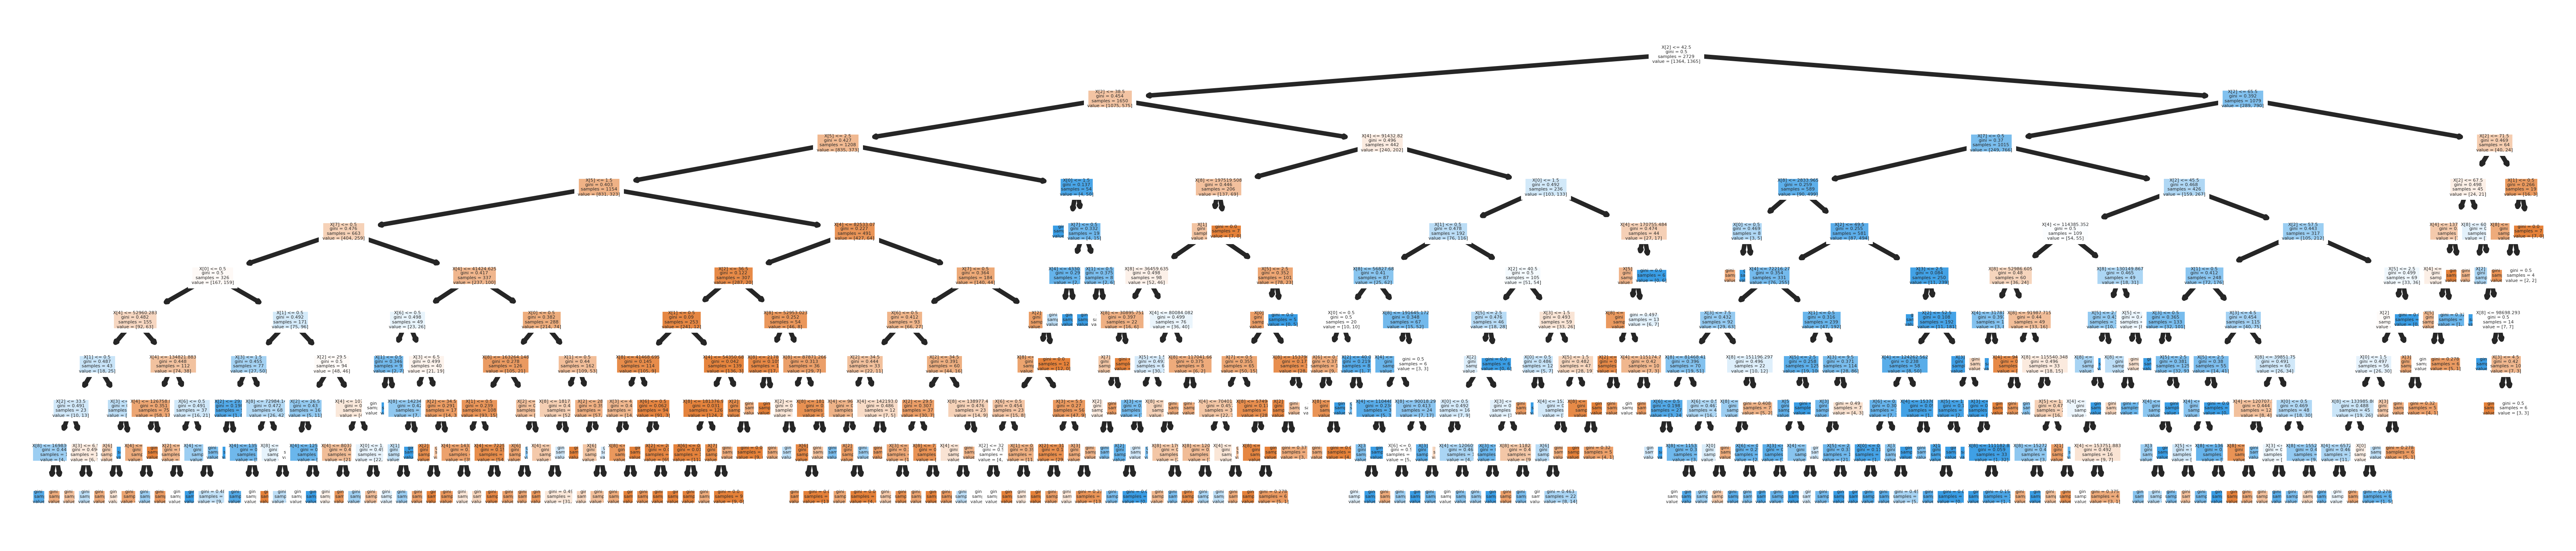

In [47]:
#Plot Random Forest - SMOTE Sampling
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (10,2), dpi=800)
tree.plot_tree(rf_clf_best_param_sm.estimators_[0],
               filled = True);
fig.savefig('SMOTE_RF.png')

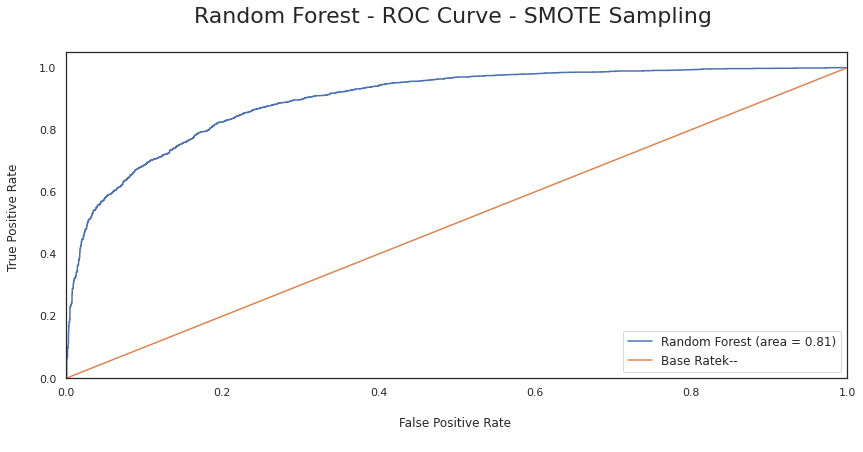

In [48]:
#Visualize AUC-ROC Curve - SMOTE Sampling
rf_probas_sm = rf_clf_best_param_sm.predict_proba(x_test_sm)[:, 1]
rf_classifier_roc_auc_sm = accuracy_score(y_test_sm, y_pred_rf_sm)
rf_fpr_sm, rf_tpr_sm, rf_thresholds_sm = roc_curve(y_test_sm, rf_probas_sm)
plt.figure(figsize=(14, 6))

# Plot Random Forest ROC
plt.plot(rf_fpr_sm, rf_tpr_sm, label='Random Forest (area = %0.2f)' % rf_classifier_roc_auc_sm)

# Plot Base Rate ROC
plt.plot([0,1], [0,1],label='Base Rate' 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.ylabel('True Positive Rate \n',horizontalalignment="center",
fontstyle = "normal", fontsize = "medium", 
fontfamily = "sans-serif")
plt.xlabel('\nFalse Positive Rate \n',horizontalalignment="center",
fontstyle = "normal", fontsize = "medium", 
fontfamily = "sans-serif")
plt.title('Random Forest - ROC Curve - SMOTE Sampling \n',horizontalalignment="center", 
fontstyle = "normal", fontsize = "22", 
fontfamily = "sans-serif")
plt.legend(loc="lower right", fontsize = "medium")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")
plt.savefig('Random Forest - ROC Curve - SMOTE Sampling.png')
plt.show()

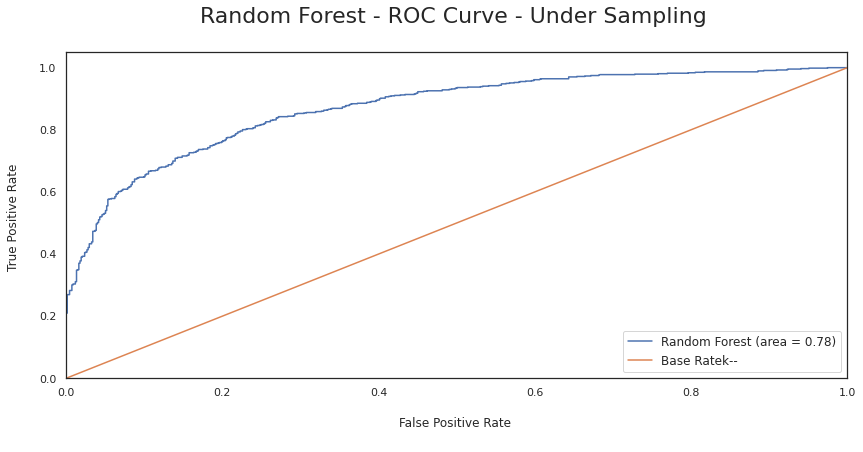

In [49]:
#Visualize AUC-ROC Curve - Under Sampling
rf_probas_under = rf_clf_best_param_under.predict_proba(x_test_under)[:, 1]
rf_classifier_roc_auc_under = accuracy_score(y_test_under, y_pred_rf_under)
rf_fpr_under, rf_tpr_under, rf_thresholds_under = roc_curve(y_test_under, rf_probas_under)
plt.figure(figsize=(14, 6))

# Plot Random Forest ROC
plt.plot(rf_fpr_under, rf_tpr_under, label='Random Forest (area = %0.2f)' % rf_classifier_roc_auc_under)

# Plot Base Rate ROC
plt.plot([0,1], [0,1],label='Base Rate' 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.ylabel('True Positive Rate \n',horizontalalignment="center",
fontstyle = "normal", fontsize = "medium", 
fontfamily = "sans-serif")
plt.xlabel('\nFalse Positive Rate \n',horizontalalignment="center",
fontstyle = "normal", fontsize = "medium", 
fontfamily = "sans-serif")
plt.title('Random Forest - ROC Curve - Under Sampling \n',horizontalalignment="center", 
fontstyle = "normal", fontsize = "22", 
fontfamily = "sans-serif")
plt.legend(loc="lower right", fontsize = "medium")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")
plt.savefig('Random Forest - ROC Curve - Under Sampling.png')
plt.show()

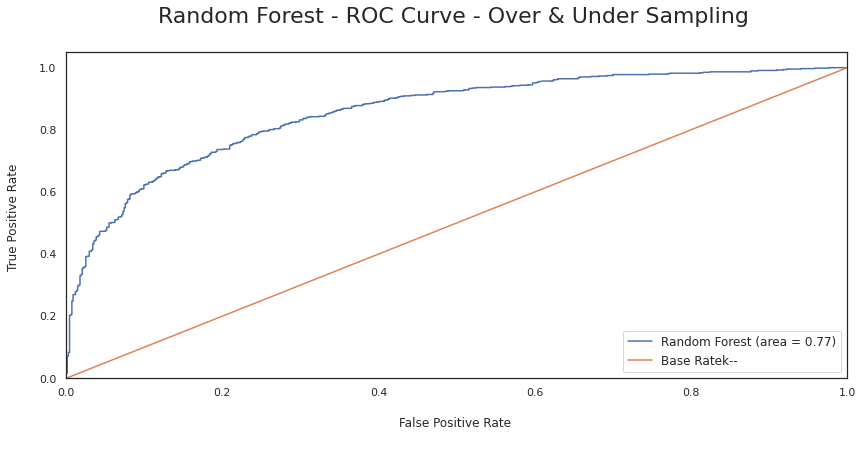

In [50]:
#Visualize AUC-ROC Curve - Over & Under Sampling
rf_probas_ou = rf_clf_best_param_ou.predict_proba(x_test_ou)[:, 1]
rf_classifier_roc_auc_ou = accuracy_score(y_test_ou, y_pred_rf_ou)
rf_fpr_ou, rf_tpr_ou, rf_thresholds_ou = roc_curve(y_test_ou, rf_probas_ou)
plt.figure(figsize=(14, 6))

# Plot Random Forest ROC
plt.plot(rf_fpr_ou, rf_tpr_ou, label='Random Forest (area = %0.2f)' % rf_classifier_roc_auc_ou)

# Plot Base Rate ROC
plt.plot([0,1], [0,1],label='Base Rate' 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.ylabel('True Positive Rate \n',horizontalalignment="center",
fontstyle = "normal", fontsize = "medium", 
fontfamily = "sans-serif")
plt.xlabel('\nFalse Positive Rate \n',horizontalalignment="center",
fontstyle = "normal", fontsize = "medium", 
fontfamily = "sans-serif")
plt.title('Random Forest - ROC Curve - Over & Under Sampling \n',horizontalalignment="center", 
fontstyle = "normal", fontsize = "22", 
fontfamily = "sans-serif")
plt.legend(loc="lower right", fontsize = "medium")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")
plt.savefig('Random Forest - ROC Curve - Over & Under Sampling.png')
plt.show()

In [51]:
#Naive Bayes Classification - Gaussian Naive Bayes
gnb_clf = GaussianNB()

#Fitting the model
#SMOTE Sampling
gnb_clf_sm = gnb_clf
gnb_clf_sm.fit(x_train_sm, y_train_sm.values.ravel())
#Under Sampling
gnb_clf_under = gnb_clf
gnb_clf_under.fit(x_train_under, y_train_under.values.ravel())
#Over&Under Sampling
gnb_clf_ou = gnb_clf
gnb_clf_ou.fit(x_train_ou, y_train_ou.values.ravel())

#Generating predictions
#SMOTE Sampling
y_pred_gnb_sm = gnb_clf_sm.predict(x_test_sm)
#Under Sampling
y_pred_gnb_under = gnb_clf_under.predict(x_test_under)
#Over&Under Sampling
y_pred_gnb_ou = gnb_clf_ou.predict(x_test_ou)

#Evaluate the Results
#SMOTE Sampling
gnb_acc_sm = accuracy_score(y_test_sm, y_pred_gnb_sm)
gnb_prec_sm = precision_score(y_test_sm, y_pred_gnb_sm)
gnb_rec_sm = recall_score(y_test_sm, y_pred_gnb_sm)
gnb_f1_sm = f1_score(y_test_sm, y_pred_gnb_sm)
#Under Sampling
gnb_acc_under = accuracy_score(y_test_under, y_pred_gnb_under)
gnb_prec_under = precision_score(y_test_under, y_pred_gnb_under)
gnb_rec_under = recall_score(y_test_under, y_pred_gnb_under)
gnb_f1_under = f1_score(y_test_under, y_pred_gnb_under)
#Over&Under Sampling
gnb_acc_ou = accuracy_score(y_test_ou, y_pred_gnb_ou)
gnb_prec_ou = precision_score(y_test_ou, y_pred_gnb_ou)
gnb_rec_ou = recall_score(y_test_ou, y_pred_gnb_ou)
gnb_f1_ou = f1_score(y_test_ou, y_pred_gnb_ou)

#Print Random Forest scores
gnb_results = pd.DataFrame(np.array([
    ['Gaussian Naive Bayes SMOTE Sampling', gnb_acc_sm, gnb_prec_sm, gnb_rec_sm, gnb_f1_sm],
    ['Gaussian Naive Bayes Under Sampling', gnb_acc_under, gnb_prec_under, gnb_rec_under, gnb_f1_under],
    ['Gaussian Naive Bayes Over & Under Sampling', gnb_acc_ou, gnb_prec_ou, gnb_rec_ou, gnb_f1_ou]]),
                          columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
gnb_results.to_csv('Classification - GNB Results.csv')
gnb_results

Model            Accuracy  \
0         Gaussian Naive Bayes SMOTE Sampling   0.690068493150685   
1         Gaussian Naive Bayes Under Sampling   0.708550185873606   
2  Gaussian Naive Bayes Over & Under Sampling  0.7063197026022305   

            Precision              Recall            F1 Score  
0  0.7061494015683037  0.6510654490106544  0.6774896060186101  
1  0.7280130293159609  0.6651785714285714  0.6951788491446346  
2  0.7244732576985413  0.6651785714285714  0.6935608999224204

In [52]:
#Gaussian Naive Bayes - Evaluate the Results
#Confusion Matrix
#Generating confusion matrix values (True Positive, False Positive, True Negative, and False Negative)
#SMOTE Sampling
gnb_tn_sm, gnb_fp_sm, gnb_fn_sm, gnb_tp_sm = confusion_matrix(y_test_sm, y_pred_gnb_sm).ravel()
#Under Sampling
gnb_tn_under, gnb_fp_under, gnb_fn_under, gnb_tp_under = confusion_matrix(y_test_under, y_pred_gnb_under).ravel()
#Over&Under Sampling
gnb_tn_ou, gnb_fp_ou, gnb_fn_ou, gnb_tp_ou = confusion_matrix(y_test_ou, y_pred_gnb_ou).ravel()

gnb_confusion_matrix = pd.DataFrame(np.array([
    ['Gaussian Naive Bayes SMOTE Sampling', gnb_tp_sm, gnb_fp_sm, gnb_tn_sm, gnb_fn_sm],
    ['Gaussian Naive Bayes Under Sampling', gnb_tp_under, gnb_fp_under, gnb_tn_under, gnb_fn_under],
    ['Gaussian Naive Bayes Over & Under Sampling', gnb_tp_ou, gnb_fp_ou, gnb_tn_ou, gnb_fn_ou]]),
                          columns = ['Model', 'True Positives', 'False Positives', 'True Negatives', 'False Negatives'])
gnb_confusion_matrix.to_csv('Classification - GNB Confusion Matrix.csv')
gnb_confusion_matrix

Model True Positives False Positives  \
0         Gaussian Naive Bayes SMOTE Sampling           1711             712   
1         Gaussian Naive Bayes Under Sampling            447             167   
2  Gaussian Naive Bayes Over & Under Sampling            447             170   

  True Negatives False Negatives  
0           1916             917  
1            506             225  
2            503             225

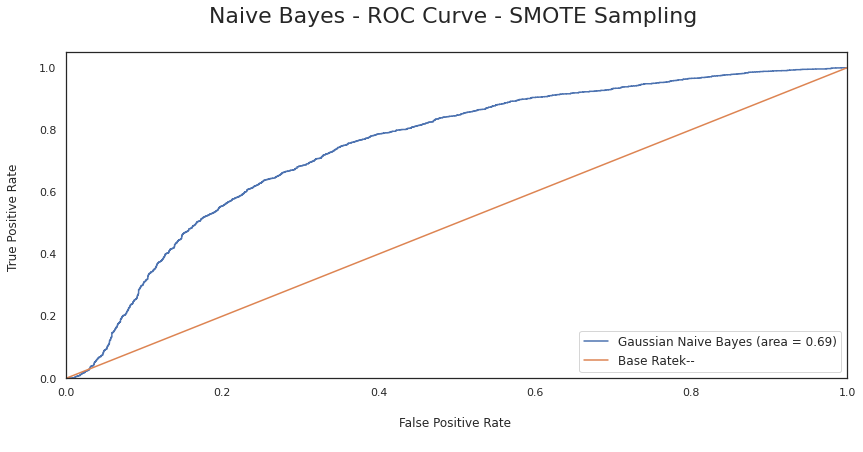

In [53]:
#Visualize AUC-ROC Curve - SMOTE Sampling
gnb_probas_sm = gnb_clf_sm.predict_proba(x_test_sm)[:, 1]
gnb_classifier_roc_auc_sm = accuracy_score(y_test_sm, y_pred_gnb_sm)
gnb_fpr_sm, gnb_tpr_sm, gnb_thresholds_sm = roc_curve(y_test_sm, gnb_probas_sm)
plt.figure(figsize=(14, 6))

# Plot Naive Bayes ROC
plt.plot(gnb_fpr_sm, gnb_tpr_sm, label='Gaussian Naive Bayes (area = %0.2f)' % gnb_classifier_roc_auc_sm)

# Plot Base Rate ROC
plt.plot([0,1], [0,1],label='Base Rate' 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.ylabel('True Positive Rate \n',horizontalalignment="center",
fontstyle = "normal", fontsize = "medium", 
fontfamily = "sans-serif")
plt.xlabel('\nFalse Positive Rate \n',horizontalalignment="center",
fontstyle = "normal", fontsize = "medium", 
fontfamily = "sans-serif")
plt.title('Naive Bayes - ROC Curve - SMOTE Sampling \n',horizontalalignment="center", 
fontstyle = "normal", fontsize = "22", 
fontfamily = "sans-serif")
plt.legend(loc="lower right", fontsize = "medium")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")
plt.savefig('Naive Bayes - ROC Curve - SMOTE Sampling.png')
plt.show()

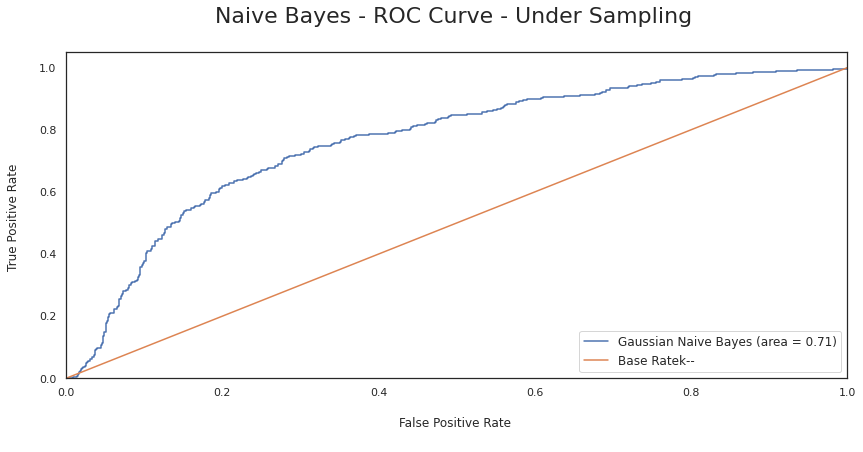

In [54]:
#Visualize AUC-ROC Curve - Under Sampling
gnb_probas_under = gnb_clf_under.predict_proba(x_test_under)[:, 1]
gnb_classifier_roc_auc_under = accuracy_score(y_test_under, y_pred_gnb_under)
gnb_fpr_under, gnb_tpr_under, gnb_thresholds_under = roc_curve(y_test_under, gnb_probas_under)
plt.figure(figsize=(14, 6))

# Plot Naive Bayes ROC
plt.plot(gnb_fpr_under, gnb_tpr_under, label='Gaussian Naive Bayes (area = %0.2f)' % gnb_classifier_roc_auc_under)

# Plot Base Rate ROC
plt.plot([0,1], [0,1],label='Base Rate' 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.ylabel('True Positive Rate \n',horizontalalignment="center",
fontstyle = "normal", fontsize = "medium", 
fontfamily = "sans-serif")
plt.xlabel('\nFalse Positive Rate \n',horizontalalignment="center",
fontstyle = "normal", fontsize = "medium", 
fontfamily = "sans-serif")
plt.title('Naive Bayes - ROC Curve - Under Sampling \n',horizontalalignment="center", 
fontstyle = "normal", fontsize = "22", 
fontfamily = "sans-serif")
plt.legend(loc="lower right", fontsize = "medium")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")
plt.savefig('Naive Bayes - ROC Curve - Under Sampling.png')
plt.show()

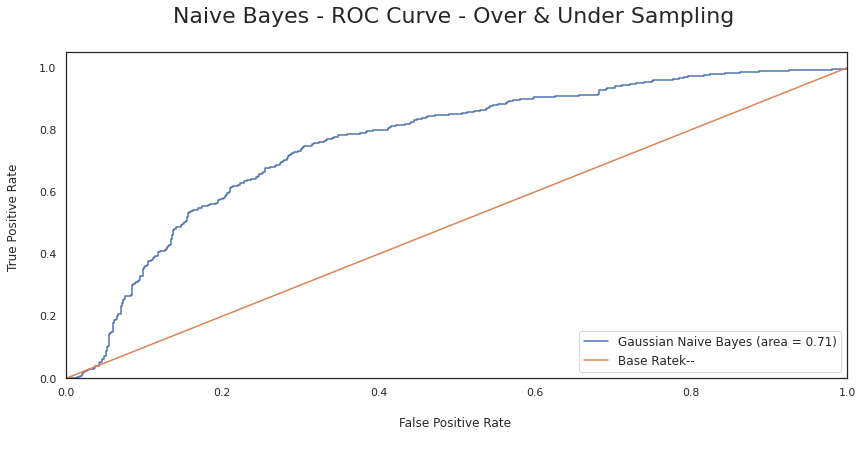

In [55]:
#Visualize AUC-ROC Curve - Over&Under Sampling
gnb_probas_ou = gnb_clf_ou.predict_proba(x_test_ou)[:, 1]
gnb_classifier_roc_auc_ou = accuracy_score(y_test_ou, y_pred_gnb_ou)
gnb_fpr_ou, gnb_tpr_ou, gnb_thresholds_ou = roc_curve(y_test_ou, gnb_probas_ou)
plt.figure(figsize=(14, 6))

# Plot Naive Bayes ROC
plt.plot(gnb_fpr_ou, gnb_tpr_ou, label='Gaussian Naive Bayes (area = %0.2f)' % gnb_classifier_roc_auc_ou)

# Plot Base Rate ROC
plt.plot([0,1], [0,1],label='Base Rate' 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.ylabel('True Positive Rate \n',horizontalalignment="center",
fontstyle = "normal", fontsize = "medium", 
fontfamily = "sans-serif")
plt.xlabel('\nFalse Positive Rate \n',horizontalalignment="center",
fontstyle = "normal", fontsize = "medium", 
fontfamily = "sans-serif")
plt.title('Naive Bayes - ROC Curve - Over & Under Sampling \n',horizontalalignment="center", 
fontstyle = "normal", fontsize = "22", 
fontfamily = "sans-serif")
plt.legend(loc="lower right", fontsize = "medium")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")
plt.savefig('Naive Bayes - ROC Curve - Over & Under Sampling.png')
plt.show()